<a href="https://colab.research.google.com/github/leo14993/analise-ligas-heas/blob/main/Analise_HEAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importando as dependencias do projeto

In [ ]:
# Prever a microestrutura de um liga atraves da composicao quimica dela 
# construir um modelo que tenha uma boa acuracia

# mostrar acuracia
# f1 score
# e matriz de confusao 

# descrever o que funcionou bem o que nao funcionou
# realizar pequena discucao do erro com as variavies
# quais classes com mais erros e menos erros 
# relacionar as composicoes que tive mais erro com variaveis

# quando for fazer a modelagem tirar a coluna ys modulo de young e type of text 

# prox etapa
#calcular a acuracia utilizando cross validation, 

#fazer balanceamento de amostragem usando duas tecnicas diferentes

# antes de fazer balanceamento separar um conjunto para teste e usar um conjunto nao balanceado para o teste.

# Acuracia esperada acima de 0.8, a matriz de confusão é mais interessante para ser usada, entender porque o erro se concentra mais em certas classes do que outras.

# realizar oversampler ( smote -  criar dados mais bem comportados) e undersampler (subamostragem )



In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

#selecao e separação de dados
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    cross_val_predict
  )

#pre processamento de dados
from sklearn.preprocessing import (
    OneHotEncoder, 
    LabelEncoder, 
    OrdinalEncoder, 
    StandardScaler
  )

# avaliação resultados
from sklearn.metrics import (
    roc_curve,
    accuracy_score, 
    confusion_matrix,
    multilabel_confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay
  )

#modelos
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

#sobreamostragem
from imblearn.over_sampling import (
    SMOTE, 
    ADASYN,
    BorderlineSMOTE, 
    KMeansSMOTE, 
    SVMSMOTE
  )

import warnings
warnings.filterwarnings('ignore')

# ! pip install yellowbrick
from yellowbrick.classifier import ROCAUC



2. Importando os dados e removendo colunas não utilizadas, e removendo linhas duplicadas

In [ ]:
# caminho google colab
df = pd.read_csv('/content/drive/MyDrive/Documentos/TCC/HEAs_Machine_Learning/dados/df_final2.csv', error_bad_lines=False, sep=';')

# removendo os dados de componentes quimicos para gerar arquivo de analise
# apenas considerando as fases e outras variaveis
# df = df.drop(['Al','Co', 'Fe','Ni',	'Si','Cr','Mn','Nb',
#               'Mo','Ti','Cu','V','Zr','Ta','Hf','W' ],axis=1)

df.drop(['PROPERTY: Type of test', 'PROPERTY: YS (MPa)' , 'Alloy name', 'index'],axis=1, inplace=True)
# df = df.drop(['PROPERTY: Type of test', 'PROPERTY: YS (MPa)' ],axis=1)


* Etapa de analise de dados(opcional)

In [ ]:
# jupyter
# !pip install pandas-profilling

# colab

#antes de executar o profile report é necessario reiniciar o ambiente de execução,
# instalar o pandas profiling para verificar a ausencia de alguma dependencia
# reiniciar novamente e importar 
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# from pandas_profiling import ProfileReport

# prof = ProfileReport(df)
# prof.to_file(output_file='analise_dados_inicial.html')


3. Conversão das variáveis categóricas em numeros inteiros / trocando valores nulos por zero

In [ ]:
# Tornando variaveis categóricas em numeros ordinais

processing_method_ord_enc = \
  OrdinalEncoder().fit(df[['PROPERTY: Processing method']])
  # LabelEncoder().fit(df[['PROPERTY: Processing method']])


# alloy_name_ord_enc = OrdinalEncoder().fit(df[['Alloy name']])
microstructure_ord_enc = \
  OrdinalEncoder().fit(df[['PROPERTY: Microstructure']])
  # LabelEncoder().fit(df[['PROPERTY: Microstructure']])
  


df['PROPERTY: Processing method'] = \
  processing_method_ord_enc.transform(df[['PROPERTY: Processing method']])
# df['Alloy name'] = alloy_name_ord_enc.transform(df[['Alloy name']])
df['PROPERTY: Microstructure'] = \
  microstructure_ord_enc.transform(df[['PROPERTY: Microstructure']])

#a = microstructure_ord_enc.inverse_transform(df[['PROPERTY: Microstructure']])


df.fillna(0,inplace=True)

df_droped_duplicates = df.drop_duplicates()
df_droped_duplicates.reset_index(inplace=True)

df_droped_duplicates.drop(['index'],axis=1, inplace=True)



4. Separar o conjunto das variaveis e o conjunto dos alvos

In [ ]:

#com duplicados
microstructure = df[['PROPERTY: Microstructure']]
properties = df[df.columns.difference(['PROPERTY: Microstructure'])]


#sem duplicados
microstructure_droped_duplicates = \
  df_droped_duplicates[['PROPERTY: Microstructure']]
properties_droped_duplicates = \
  df_droped_duplicates[df_droped_duplicates.columns.difference(
      ['PROPERTY: Microstructure']
  )]

x_train, x_test, y_train, y_test = train_test_split(
    properties,
    microstructure,
    test_size = 0.3,
    random_state = 99   
    )

x_train_droped_duplicates, x_test_droped_duplicates, \
y_train_droped_duplicates, y_test_droped_duplicates = train_test_split(
    properties_droped_duplicates,
    microstructure_droped_duplicates,
    test_size = 0.3,
    random_state = 99   
    )


# df_droped_duplicates.drop(['index'],axis=1, inplace=True)

x_train_droped_duplicates.reset_index(inplace=True)
x_train_droped_duplicates.drop(['index',],axis=1, inplace=True)
x_test_droped_duplicates.reset_index(inplace=True)
x_test_droped_duplicates.drop(['index',],axis=1, inplace=True)
y_train_droped_duplicates.reset_index(inplace=True)
y_train_droped_duplicates.drop(['index'],axis=1, inplace=True)
y_test_droped_duplicates.reset_index(inplace=True)
y_test_droped_duplicates.drop(['index'],axis=1, inplace=True)


k_folds = 10

n_validations = 10

Função para plotar matriz de confusão

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAcurácia={:0.3f}\nPrecisão={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAcurácia={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)

    image_plot = sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    

    if xyplotlabels:
        plt.ylabel('Microestruturas reais')
        plt.xlabel('Microestruturas previstas' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)


5. Comparando resultados de dados duplicados ou não duplicados

  5.1. Com duplicados

In [ ]:
default_forest = RandomForestClassifier()

microstructures = ['BCC','BCC ++','BCC B2','FCC','FCC ++','FCC BCC','OTHER']

is_float = lambda x : x.replace('.','',1).isdigit()

inverse_transform_microstructure = lambda x : microstructure_ord_enc.inverse_transform([[float(x)]])[0][0]

In [ ]:
#1. predition with cross validation
microstructure_pred = cross_val_predict(
    default_forest, 
    properties, 
    microstructure.values.reshape(-1,), 
    cv=k_folds
  )

#2. fitting model with all data
default_forest_fit = default_forest.fit(
    properties, 
    microstructure.values.reshape(-1,)
  )

#3. Confusion matrix with Diagonal 
confusion_matrix_microstructure = confusion_matrix(
      microstructure, 
      microstructure_pred
  )

#4. confusion matrix with TP, TN, FP, FN
multilabel_confusion_matrix_microstructure = \
  multilabel_confusion_matrix(microstructure, microstructure_pred)

#5. get classification report 
# with the report, we have a bigger picture, with precision and recall for each class
clf_report = classification_report(
    microstructure, 
    microstructure_pred, 
    output_dict=True
  ) 

#6. applyting name of microstructures on axis
clf_report = {(inverse_transform_microstructure(k) if is_float(k) else k):v 
              for (k,v) in clf_report.items()}

#7. creating dataframe
df_classification_report = pd.DataFrame(clf_report).transpose()



  5.1. Sem duplicados

In [ ]:
#1. predition with cross validation
microstructure_pred_droped_duplicates = cross_val_predict(
    default_forest, 
    properties_droped_duplicates, 
    microstructure_droped_duplicates.values.reshape(-1,), 
    cv=k_folds
  )

#2. fitting model with duplicates removed
microstructure_confusion_matrix_droped_duplicates = \
  multilabel_confusion_matrix(
      microstructure_droped_duplicates, 
      microstructure_pred_droped_duplicates
  )

#3. Confusion matrix with Diagonal 
confusion_matrix_microstructure_droped_duplicates = confusion_matrix(
      microstructure_droped_duplicates, 
      microstructure_pred_droped_duplicates
  )

#4. confusion matrix with TP, TN, FP, FN
multilabel_confusion_matrix_microstructure_droped_duplicates = \
  multilabel_confusion_matrix(
      microstructure_droped_duplicates, 
      microstructure_pred_droped_duplicates
    )

#5. get classification report 
clf_report_droped_duplicates = classification_report(
    microstructure_droped_duplicates, 
    microstructure_pred_droped_duplicates, 
    output_dict=True
  )

#6. applyting name of microstructures on axis
clf_report_droped_duplicates = {
    (inverse_transform_microstructure(k) 
    if is_float(k) else k):v 
    for (k,v) in clf_report_droped_duplicates.items()
  }

#7. creating dataframe
df_classification_report_droped_duplicates = pd.DataFrame(clf_report_droped_duplicates).transpose()



Dados Completos 
- relatório com métricas
- Matriz de confusão


 relatorio de dados sem duplicados, n= (589, 27)

               precision    recall  f1-score    support
BCC            0.751553  0.785714  0.768254  154.00000
BCC ++         0.558824  0.441860  0.493506   86.00000
BCC B2         0.500000  0.571429  0.533333   42.00000
FCC            0.714286  0.748299  0.730897  147.00000
FCC ++         0.578125  0.445783  0.503401   83.00000
FCC BCC        0.491525  0.644444  0.557692   45.00000
OTHER          0.485714  0.531250  0.507463   32.00000
accuracy       0.638370  0.638370  0.638370    0.63837
macro avg      0.582861  0.595540  0.584935  589.00000
weighted avg   0.637426  0.638370  0.634485  589.00000 



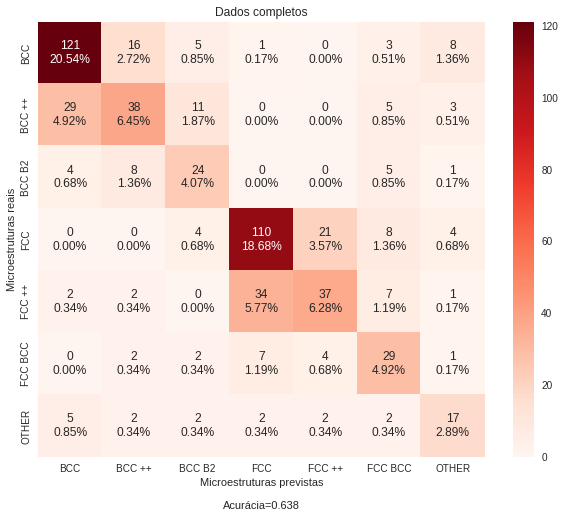

In [ ]:
print('\n relatorio de dados sem duplicados, n=', 
      properties.shape)
print('\n', df_classification_report, '\n')
make_confusion_matrix(confusion_matrix_microstructure, 
                      figsize=(10,8), 
                      categories=microstructures,
                      cmap='Reds',
                      title='Dados completos')

Dados sem duplicados
- relatório com métricas
- Matriz de confusão




 relatorio de dados sem duplicados, n= (382, 27)

               precision    recall  f1-score     support
BCC            0.725664  0.766355  0.745455  107.000000
BCC ++         0.540000  0.409091  0.465517   66.000000
BCC B2         0.459459  0.548387  0.500000   31.000000
FCC            0.481013  0.612903  0.539007   62.000000
FCC ++         0.675676  0.471698  0.555556   53.000000
FCC BCC        0.545455  0.571429  0.558140   42.000000
OTHER          0.409091  0.428571  0.418605   21.000000
accuracy       0.581152  0.581152  0.581152    0.581152
macro avg      0.548051  0.544062  0.540326  382.000000
weighted avg   0.588123  0.581152  0.578752  382.000000 



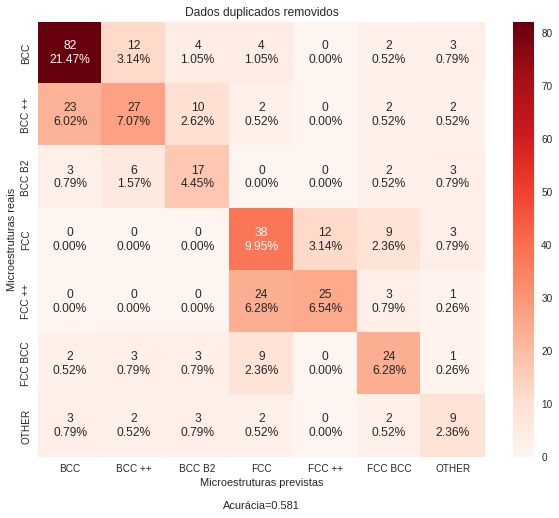

In [ ]:
print('\n relatorio de dados sem duplicados, n=', 
      properties_droped_duplicates.shape)
print('\n', df_classification_report_droped_duplicates, '\n')
make_confusion_matrix(confusion_matrix_microstructure_droped_duplicates, 
                      figsize=(10,8), 
                      categories=microstructures,
                      cmap='Reds',
                      title='Dados duplicados removidos')

5. Normalização dos dados




> As colunas que possuem variaveis categóricas convertidas em numéricas, não precisam ser normalizadas, umas vez que que os valores são equidistantes. 

> Colunas dos elementos quimicos possuem seus valores em porcentagem, neste caso também não podem ser normalizados, quando normalizados perdem seu real significado e valor.

> Apenas os dados sem duplicados serão normalizados, uma vez que já foi feita uma comparação no bloco anterior.


In [ ]:
#----------------------------------------------------------------
# Normalizando os dados
#----------------------------------------------------------------

properties_to_not_normalize = properties_droped_duplicates[['PROPERTY: Processing method',
  'Al','Co', 'Fe','Ni',	'Si','Cr','Mn','Nb',
  'Mo','Ti','Cu','V','Zr','Ta','Hf','W']]

columns_to_normalize = properties_droped_duplicates.columns.difference([
  'PROPERTY: Processing method',
  'Al','Co', 'Fe','Ni',	'Si','Cr','Mn','Nb',
  'Mo','Ti','Cu','V','Zr','Ta','Hf','W'])

properties_to_normalize = properties_droped_duplicates[columns_to_normalize]

std_properties = StandardScaler().fit(properties_to_normalize)

normalized_properties = std_properties.transform(properties_to_normalize)

properties_droped_duplicates_normalized = \
  pd.concat([pd.DataFrame(normalized_properties, columns=columns_to_normalize),
            properties_to_not_normalize], 
            axis=1
  )

df_properties_droped_duplicates_normalized = pd.concat(
    (properties_droped_duplicates_normalized,
    microstructure_droped_duplicates),
    axis=1
    )

x_train_normalized, x_test_normalized, y_train_normalized, y_test_normalized = \
  train_test_split(
    properties_droped_duplicates_normalized,
    microstructure_droped_duplicates,
    test_size = 0.3,
    random_state = 99   
    )


# df_droped_duplicates.drop(['index'],axis=1, inplace=True)

x_train_normalized.reset_index(inplace=True)
x_train_normalized.drop(['index',],axis=1, inplace=True)
x_test_normalized.reset_index(inplace=True)
x_test_normalized.drop(['index',],axis=1, inplace=True)
y_train_normalized.reset_index(inplace=True)
y_train_normalized.drop(['index'],axis=1, inplace=True)
y_test_normalized.reset_index(inplace=True)
y_test_normalized.drop(['index'],axis=1, inplace=True)

6. Verificando influência da normalização no conjunto de dados

In [ ]:

microstructure_pred_droped_duplicates_normalized = cross_val_predict(
    default_forest, 
    properties_droped_duplicates_normalized, 
    microstructure_droped_duplicates.values.reshape(-1,), 
    cv=k_folds
  )

microstructure_confusion_matrix_droped_duplicates_normalized = \
  multilabel_confusion_matrix(
      microstructure_droped_duplicates, 
      microstructure_pred_droped_duplicates_normalized
  )

clf_report_droped_duplicates_normalized = classification_report(
    microstructure_droped_duplicates, 
    microstructure_pred_droped_duplicates_normalized,
    output_dict=True
  )

# transform column index number to microstructure
clf_report_droped_duplicates_normalized = {
    (inverse_transform_microstructure(k) 
    if is_float(k) else k):v 
    for (k,v) in clf_report_droped_duplicates_normalized.items()
  }

df_classification_report_droped_duplicates_normalized = pd.DataFrame(
    clf_report_droped_duplicates_normalized
  ).transpose()

# df_classification_report.index.names = ['microstructure']

cm_microstructure_droped_duplicates_normalized = confusion_matrix(
      microstructure_droped_duplicates.values.reshape(-1,), 
      microstructure_pred_droped_duplicates_normalized
  )



Dados não normalizados
- relatório com métricas
- Matriz de confusão


 relatorio de dados não normalizados (382, 27)

               precision    recall  f1-score     support
BCC            0.725664  0.766355  0.745455  107.000000
BCC ++         0.540000  0.409091  0.465517   66.000000
BCC B2         0.459459  0.548387  0.500000   31.000000
FCC            0.481013  0.612903  0.539007   62.000000
FCC ++         0.675676  0.471698  0.555556   53.000000
FCC BCC        0.545455  0.571429  0.558140   42.000000
OTHER          0.409091  0.428571  0.418605   21.000000
accuracy       0.581152  0.581152  0.581152    0.581152
macro avg      0.548051  0.544062  0.540326  382.000000
weighted avg   0.588123  0.581152  0.578752  382.000000 



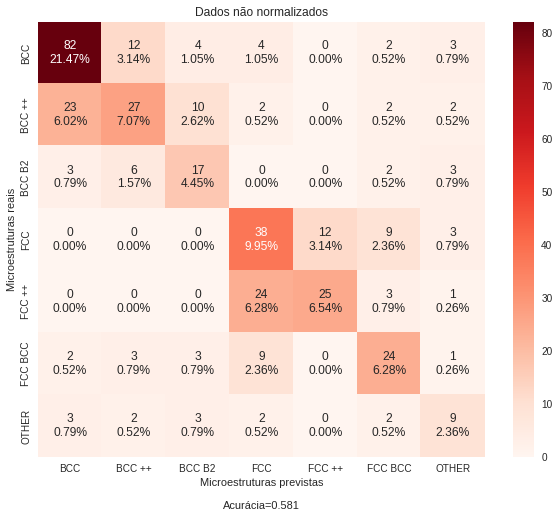

In [ ]:
print('\n relatorio de dados não normalizados', 
      properties_droped_duplicates.shape)
print('\n', df_classification_report_droped_duplicates, '\n')
make_confusion_matrix(confusion_matrix_microstructure_droped_duplicates, 
                      figsize=(10,8), 
                      categories=microstructures,
                      cmap='Reds',
                      title='Dados não normalizados')

# cmd = ConfusionMatrixDisplay
# ConfusionMatrixDisplay.from_predictions(microstructure_droped_duplicates,microstructure_pred_droped_duplicates)

Dados normalizados
- relatório com métricas
- Matriz de confusão


 relatorio de dados normalizados (382, 27)

               precision    recall  f1-score     support
BCC            0.694915  0.766355  0.728889  107.000000
BCC ++         0.574468  0.409091  0.477876   66.000000
BCC B2         0.421053  0.516129  0.463768   31.000000
FCC            0.506494  0.629032  0.561151   62.000000
FCC ++         0.625000  0.471698  0.537634   53.000000
FCC BCC        0.585366  0.571429  0.578313   42.000000
OTHER          0.380952  0.380952  0.380952   21.000000
accuracy       0.578534  0.578534  0.578534    0.578534
macro avg      0.541178  0.534955  0.532655  382.000000
weighted avg   0.582294  0.578534  0.574563  382.000000 



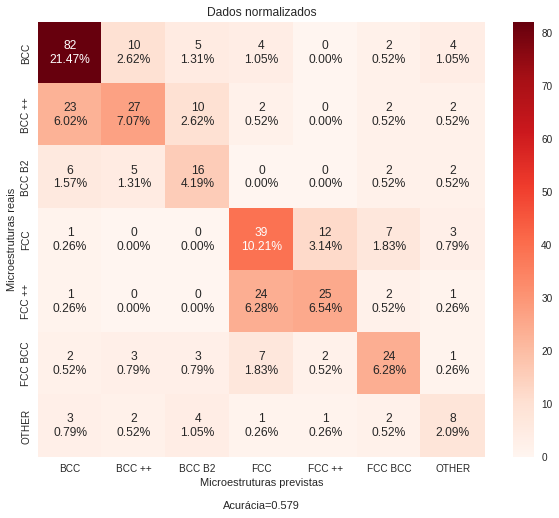

In [ ]:
print('\n relatorio de dados normalizados', 
      properties_droped_duplicates_normalized.shape)
print('\n', df_classification_report_droped_duplicates_normalized, '\n')
make_confusion_matrix(cm_microstructure_droped_duplicates_normalized, 
                      figsize=(10,8), 
                      categories=microstructures,
                      cmap='Reds',
                      title='Dados normalizados')

# ConfusionMatrixDisplay.from_predictions(microstructure_droped_duplicates, microstructure_pred_droped_duplicates_normalized)

7. Comparando diferentes modelos

Nessa etapa são instanciados diversos modelos diferentes, e são comparados quais modelos performam melhor

In [ ]:
# first, initialize the classificators
# Random Forest, Multilayer Perceptron, K-nearest Neighbor e Support Vector Machine

forest = RandomForestClassifier(
    # max_depth=10,  # sem melhoras 

    # random_state=54, 
    # criterion='entropy', 
    # max_features='log2',

    # n_estimators = 50,
    # min_samples_split=2, 
    # min_samples_leaf=1,
    # min_weight_fraction_leaf=0.0
    )

mlp = MLPClassifier(
    # random_state=54, 
    # max_iter=300,
    # solver="adam",
    # hidden_layer_sizes = (100),
    # activation = "relu",
    # batch_size = 200,
    # learning_rate_init = 0.001,
    # tol = 0.000010
    )
knn = KNeighborsClassifier(
    # n_neighbors=3,
    # metric = "minkowski",
    # p = 2
    )
svm = SVC(
    # random_state=54,
    # kernel = "rbf",
    # C = 2.0
    )

gboost = GradientBoostingClassifier(
    # loss='exponential',

    # n_estimators=245, 
    # learning_rate=1.0,
    #  max_depth=1, 

#     random_state=0,
# max_leaf_nodes=10
)


 Model:  RandomForestClassifier
              precision    recall  f1-score     support
BCC            0.658120  0.719626  0.687500  107.000000
BCC ++         0.434783  0.303030  0.357143   66.000000
BCC B2         0.441860  0.612903  0.513514   31.000000
FCC            0.513158  0.629032  0.565217   62.000000
FCC ++         0.564103  0.415094  0.478261   53.000000
FCC BCC        0.581395  0.595238  0.588235   42.000000
OTHER          0.555556  0.476190  0.512821   21.000000
accuracy       0.554974  0.554974  0.554974    0.554974
macro avg      0.535568  0.535874  0.528956  382.000000
weighted avg   0.551337  0.554974  0.546909  382.000000

 Model:  MLPClassifier
              precision    recall  f1-score     support
BCC            0.691667  0.775701  0.731278  107.000000
BCC ++         0.525000  0.318182  0.396226   66.000000
BCC B2         0.434783  0.645161  0.519481   31.000000
FCC            0.565217  0.629032  0.595420   62.000000
FCC ++         0.500000  0.433962  0.464646   5

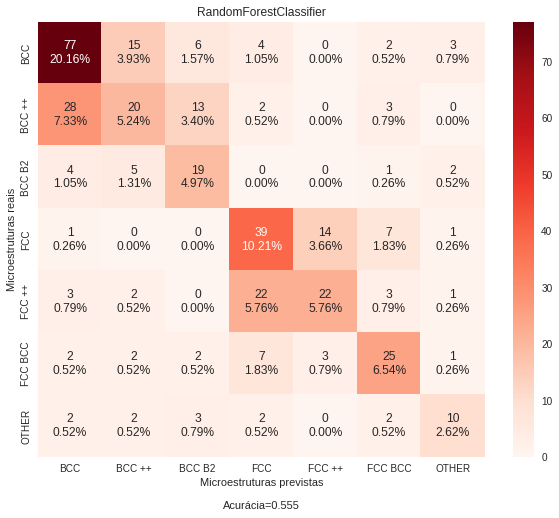

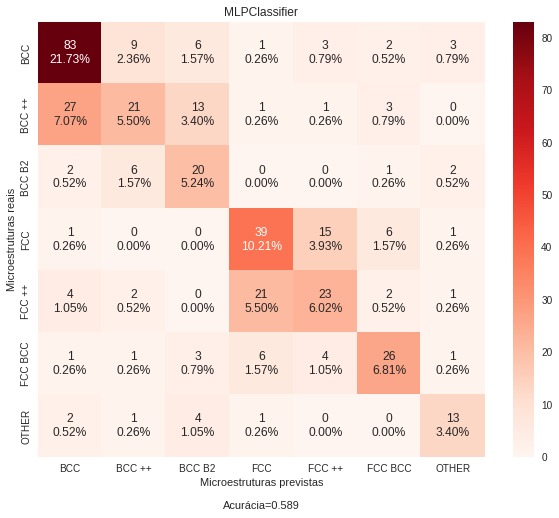

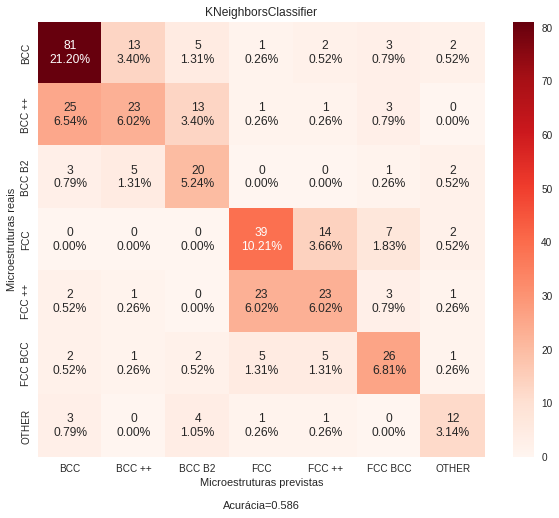

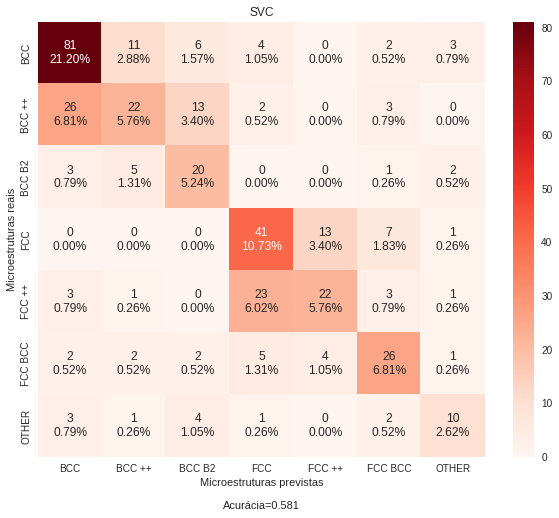

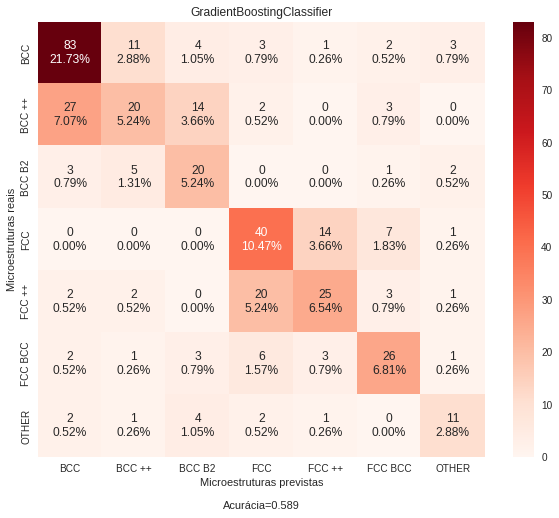

In [ ]:
# now, create a list with the objects 
models= [
  forest, 
  mlp, 
  knn, 
  svm,
  gboost
]

# df_accuracy_pstdev_normalized = pd.DataFrame({'model':[],'means':[],'pstdev':[]})

cm_microstructure_models = {}

for model in models:

  # x_train_normalized,
  # y_train_normalized,

  # x_test_normalized,
  # y_test_normalized


  microstructure_pred = cross_val_predict(
      default_forest, 
      normalized_properties,
      microstructure_droped_duplicates.values.reshape(-1,),
      cv=k_folds 
    )

  microstructure_multilabel_confusion_matrix = \
    multilabel_confusion_matrix(
        microstructure_droped_duplicates,
        microstructure_pred
    )
  
  microstructure_confusion_matrix = \
    confusion_matrix(
        microstructure_droped_duplicates,
        microstructure_pred
    )

  clf_report = classification_report(
      microstructure_droped_duplicates,
      microstructure_pred,
      output_dict=True
    )

  # transform column index number to microstructure
  clf_report = {
      (inverse_transform_microstructure(k) 
      if is_float(k) else k):v 
      for (k,v) in clf_report.items()
    }

  df_classification_report = pd.DataFrame(
      clf_report
    ).transpose()

  model_name = str(model.__class__.__name__)

  print('\n Model: ', model_name)
  print(df_classification_report)

  cm_microstructure_models[model_name] = \
    microstructure_confusion_matrix

  make_confusion_matrix(microstructure_confusion_matrix, 
                        figsize=(10,8), 
                        categories=microstructures,cmap='Reds',
                        title=model_name)


# cm_microstructure_droped_duplicates_normalized = confusion_matrix(
#       microstructure_droped_duplicates.values.reshape(-1,), 
#       microstructure_pred_droped_duplicates_normalized
#   )
  # ------------------------------------------------

# print(df_accuracy_pstdev_normalized)


  



8. Homologação 

Verificar os modelos usando dados de teste 


 Model:  RandomForestClassifier
              precision    recall  f1-score     support
BCC            0.789474  0.909091  0.845070   33.000000
BCC ++         0.692308  0.562500  0.620690   16.000000
BCC B2         0.750000  0.666667  0.705882    9.000000
FCC            0.578947  0.611111  0.594595   18.000000
FCC ++         0.888889  0.444444  0.592593   18.000000
FCC BCC        0.521739  0.923077  0.666667   13.000000
OTHER          0.800000  0.500000  0.615385    8.000000
accuracy       0.695652  0.695652  0.695652    0.695652
macro avg      0.717337  0.659556  0.662983  115.000000
weighted avg   0.725941  0.695652  0.688091  115.000000

 Model:  MLPClassifier
              precision    recall  f1-score     support
BCC            0.800000  0.848485  0.823529   33.000000
BCC ++         0.700000  0.437500  0.538462   16.000000
BCC B2         0.444444  0.444444  0.444444    9.000000
FCC            0.615385  0.444444  0.516129   18.000000
FCC ++         0.550000  0.611111  0.578947   1

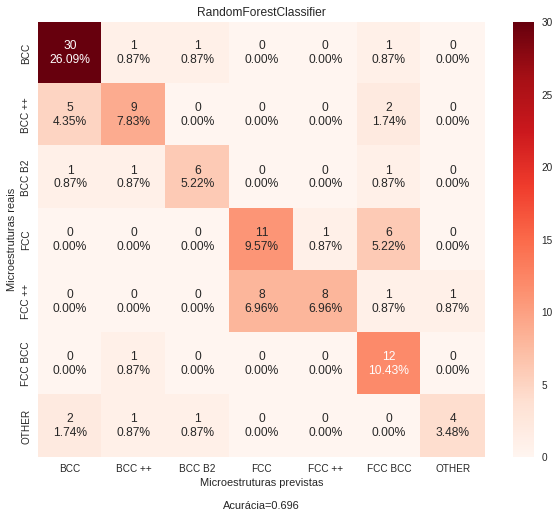

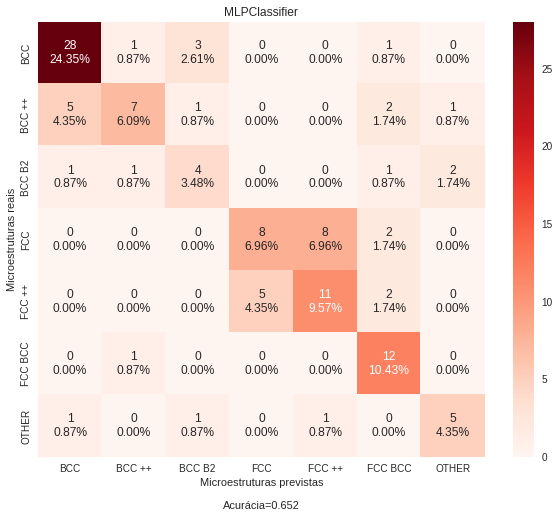

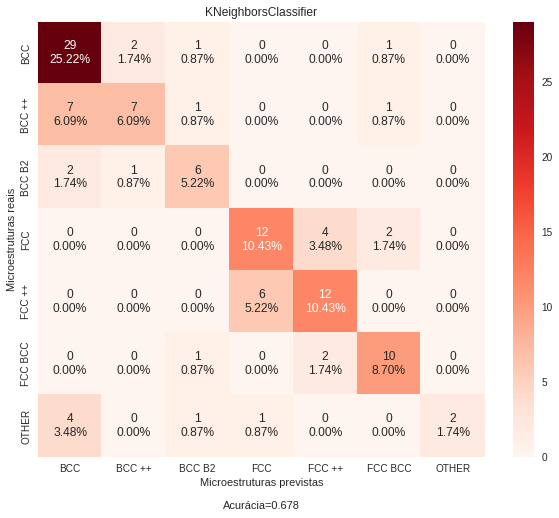

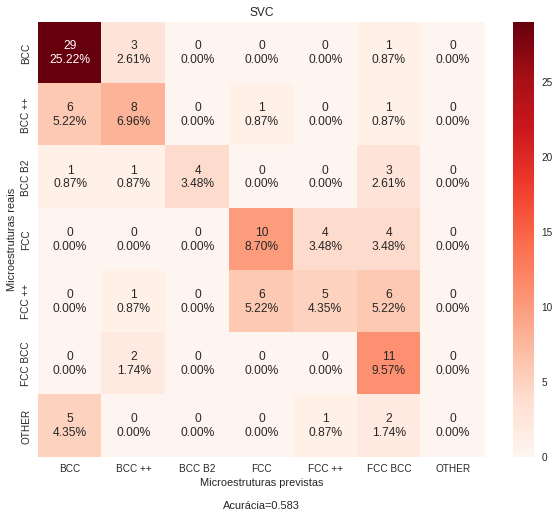

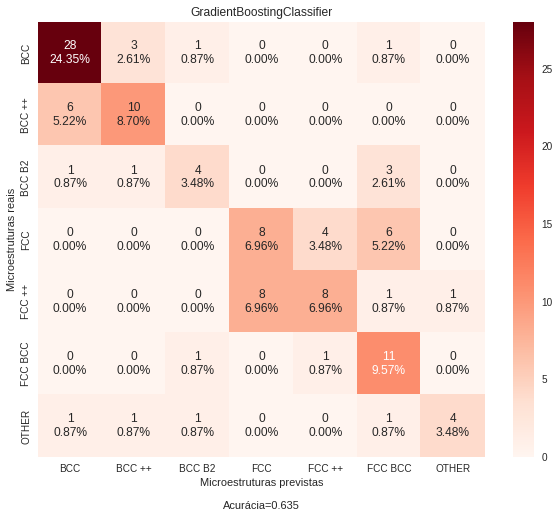

In [ ]:
cm_microstructure_models_hml = {}

  # x_train_normalized,
  # y_train_normalized,

  # x_test_normalized,
  # y_test_normalized

for model in models:

  homolog_fit = model.fit(
      x_train_normalized,
      y_train_normalized.values.reshape(-1,)
      )

  caracteristic_homolog_pred = homolog_fit.predict(x_test_normalized)

  clf_report_oversampled_homolog = classification_report(
      y_test_normalized, 
      caracteristic_homolog_pred,
      output_dict=True
    )

  microstructure_multilabel_confusion_matrix = \
    multilabel_confusion_matrix(
      y_test_normalized, 
      caracteristic_homolog_pred,
    )
  
  microstructure_confusion_matrix = \
    confusion_matrix(
      y_test_normalized, 
      caracteristic_homolog_pred,
    )

  clf_report = classification_report(
      y_test_normalized, 
      caracteristic_homolog_pred,
      output_dict=True
    )

  # transform column index number to microstructure
  clf_report = {
      (inverse_transform_microstructure(k) 
      if is_float(k) else k):v 
      for (k,v) in clf_report.items()
    }

  df_classification_report = pd.DataFrame(
      clf_report
    ).transpose()

  model_name = str(model.__class__.__name__)

  print('\n Model: ', model_name)
  print(df_classification_report)

  cm_microstructure_models[model_name] = \
    microstructure_confusion_matrix

  make_confusion_matrix(microstructure_confusion_matrix, 
                        figsize=(10,8), 
                        categories=microstructures,cmap='Reds',
                        title=model_name)

7. Criando sobreamostragem 

In [ ]:
# sm = SMOTE(random_state=42)
# am = ADASYN(random_state=42)

samplers = [
    SMOTE(random_state=99),
    ADASYN(random_state=99),
    BorderlineSMOTE(random_state=0), #kind="borderline-1"),
    KMeansSMOTE(random_state=0),
    SVMSMOTE(random_state=0),

]


data_oversampled = {}
data_normalized_oversampled = {}


for sampler in samplers:

  properties_train_oversampled, microstructure_train_oversampled = \
    sampler.fit_resample(x_train_droped_duplicates, 
    y_train_droped_duplicates.values.reshape(-1,)
    )

  properties_train_oversampled = pd.DataFrame(
      properties_train_oversampled, 
      columns=x_train_droped_duplicates.columns
    )

  microstructure_train_oversampled = pd.DataFrame(
      microstructure_train_oversampled, 
      columns=['PROPERTY: Microstructure']
    )

  data_oversampled[str(sampler.__class__.__name__)] = {
      'properties_train_oversampled': properties_train_oversampled,
      'microstructure_train_oversampled': microstructure_train_oversampled 
    }

  #normalizado
  x_train_normalized, x_test_normalized, y_train_normalized, y_test_normalized

  properties_train_oversampled, microstructure_train_oversampled = \
    sampler.fit_resample(x_train_normalized, 
    y_train_normalized.values.reshape(-1,)
    )

  properties_train_oversampled = pd.DataFrame(
      properties_train_oversampled, 
      columns=x_train_normalized.columns
    )

  microstructure_train_oversampled = pd.DataFrame(
      microstructure_train_oversampled, 
      columns=['PROPERTY: Microstructure']
    )

  data_normalized_oversampled[str(sampler.__class__.__name__)] = {
      'properties_train_oversampled': properties_train_oversampled,
      'microstructure_train_oversampled': microstructure_train_oversampled 
    }

Sampler:  SMOTE
              precision    recall  f1-score     support
BCC            0.740741  0.810811  0.774194   74.000000
BCC ++         0.774648  0.743243  0.758621   74.000000
BCC B2         0.866667  0.878378  0.872483   74.000000
FCC            0.788732  0.756757  0.772414   74.000000
FCC ++         0.794521  0.783784  0.789116   74.000000
FCC BCC        0.779221  0.810811  0.794702   74.000000
OTHER          0.871429  0.824324  0.847222   74.000000
accuracy       0.801158  0.801158  0.801158    0.801158
macro avg      0.802280  0.801158  0.801250  518.000000
weighted avg   0.802280  0.801158  0.801250  518.000000


Sampler:  ADASYN
              precision    recall  f1-score     support
BCC            0.766234  0.797297  0.781457   74.000000
BCC ++         0.794118  0.760563  0.776978   71.000000
BCC B2         0.875000  0.851351  0.863014   74.000000
FCC            0.710526  0.720000  0.715232   75.000000
FCC ++         0.763889  0.733333  0.748299   75.000000
FCC BCC      

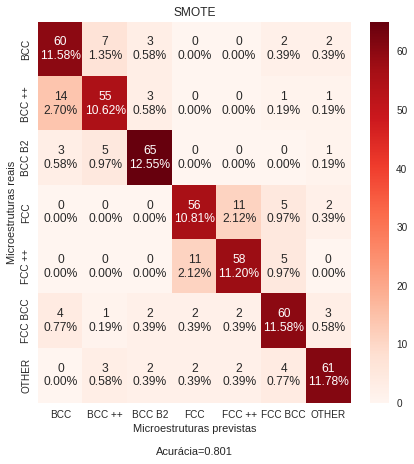

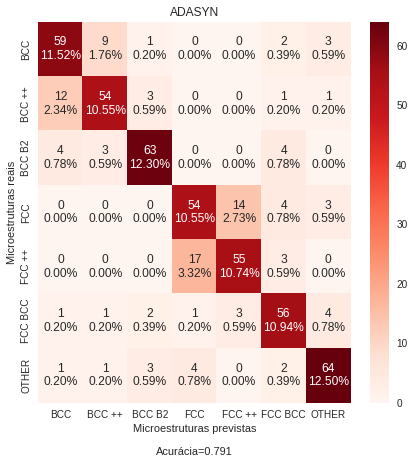

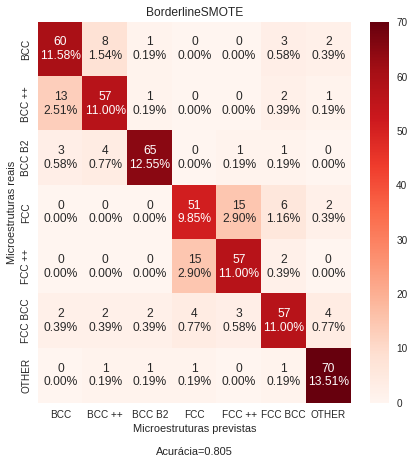

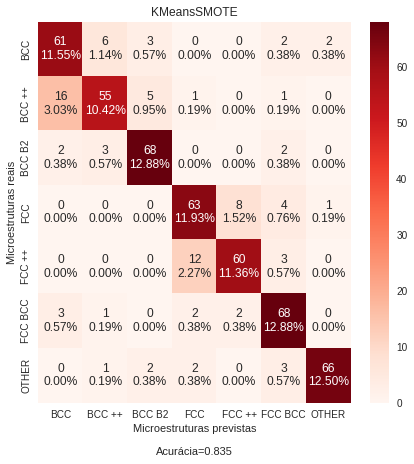

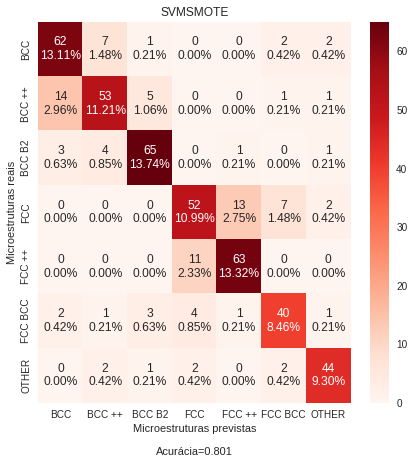

In [ ]:
# properties_oversampled, microstructure_oversampled
cm_microstructure_oversampled = {}

for oversampled in data_oversampled.keys():
  microstructure_pred_oversampled = cross_val_predict(
      default_forest, 
      data_oversampled[oversampled]['properties_train_oversampled'], 
      data_oversampled[oversampled]['microstructure_train_oversampled'],
      cv=k_folds
    )

  microstructure_multilabel_confusion_matrix_oversampled = \
    multilabel_confusion_matrix(
        data_oversampled[oversampled]['microstructure_train_oversampled'], 
        microstructure_pred_oversampled
    )
  
  microstructure_confusion_matrix_oversampled = \
    confusion_matrix(
        data_oversampled[oversampled]['microstructure_train_oversampled'], 
        microstructure_pred_oversampled
    )

  clf_report_oversampled = classification_report(
      data_oversampled[oversampled]['microstructure_train_oversampled'], 
      microstructure_pred_oversampled,
      output_dict=True
    )

  # transform column index number to microstructure
  clf_report_oversampled = {
      (inverse_transform_microstructure(k) 
      if is_float(k) else k):v 
      for (k,v) in clf_report_oversampled.items()
    }

  df_classification_report_oversampled = pd.DataFrame(
      clf_report_oversampled
    ).transpose()

  print('Sampler: ',oversampled)
  print(df_classification_report_oversampled)

  cm_microstructure_oversampled[oversampled] = \
    microstructure_confusion_matrix_oversampled

  make_confusion_matrix(microstructure_confusion_matrix_oversampled, 
                        figsize=(7,7), 
                        categories=microstructures,cmap='Reds',
                        title=oversampled)

  # fig, axn = plt.subplots(,5, sharex=True, sharey=True,figsize=(12,))

  # for i, ax in enumerate(axn.flat):
  #     k = list(cm_microstructure_oversampled)[i]
  #     sns.heatmap(cm_microstructure_oversampled[k], ax=ax,cbar=i==4)
  #     ax.set_title(k,fontsize=8)

  # clf = default_forest.fit(
  #     data_oversampled[oversampled]['properties_train_oversampled'], 
  #     data_oversampled[oversampled]['microstructure_train_oversampled']
  #   )

  # print('\n',oversampled)

  # print(microstructure_confusion_matrix_oversampled)

  # plt.show()


  print('\n')

Sampler:  SMOTE
              precision    recall  f1-score    support
BCC            0.756757  0.848485  0.800000   33.00000
BCC ++         0.727273  0.500000  0.592593   16.00000
BCC B2         0.555556  0.555556  0.555556    9.00000
FCC            0.562500  0.500000  0.529412   18.00000
FCC ++         0.714286  0.555556  0.625000   18.00000
FCC BCC        0.571429  0.923077  0.705882   13.00000
OTHER          0.571429  0.500000  0.533333    8.00000
accuracy       0.660870  0.660870  0.660870    0.66087
macro avg      0.637033  0.626096  0.620254  115.00000
weighted avg   0.666013  0.660870  0.653079  115.00000


Sampler:  ADASYN
              precision    recall  f1-score     support
BCC            0.771429  0.818182  0.794118   33.000000
BCC ++         0.615385  0.500000  0.551724   16.000000
BCC B2         0.555556  0.555556  0.555556    9.000000
FCC            0.647059  0.611111  0.628571   18.000000
FCC ++         0.833333  0.555556  0.666667   18.000000
FCC BCC        0.545455 

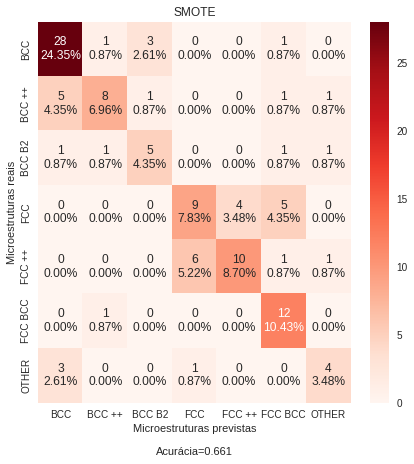

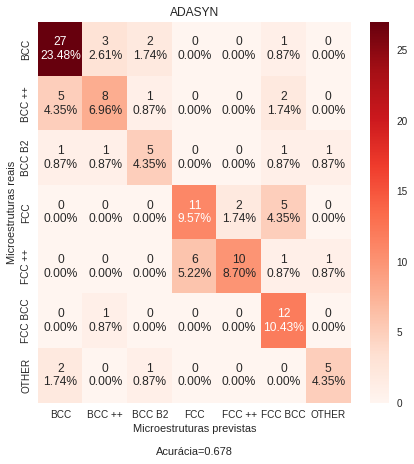

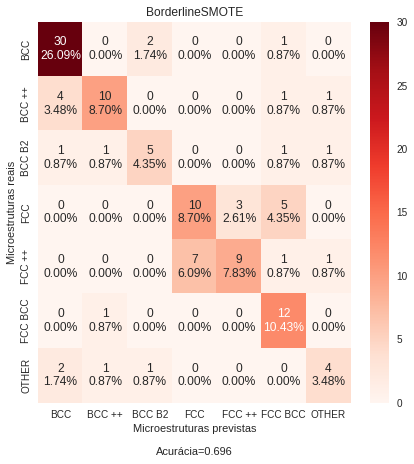

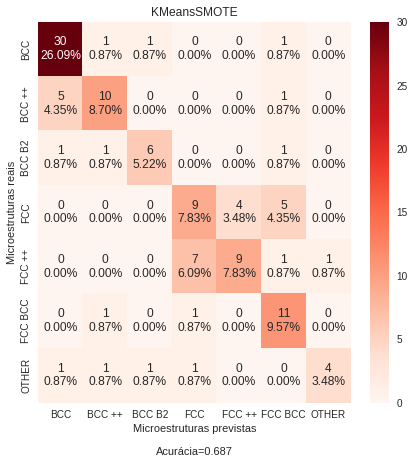

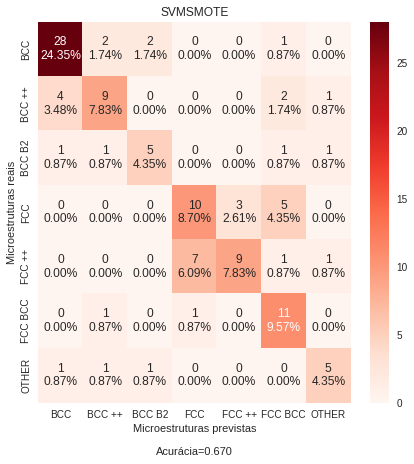

In [ ]:
default_forest = RandomForestClassifier()

cm_microstructure_oversampled_homolog = {}

for oversampled in data_oversampled.keys():
  

  homolog_fit = default_forest.fit(
      data_oversampled[oversampled]['properties_train_oversampled'], 
      data_oversampled[oversampled]['microstructure_train_oversampled']
      )

  caracteristic_homolog_pred = homolog_fit.predict(x_test_droped_duplicates)

  clf_report_oversampled_homolog = classification_report(
      y_test_droped_duplicates, 
      caracteristic_homolog_pred,
      output_dict=True
    )

  # transform column index number to microstructure
  clf_report_oversampled_homolog = {
      (inverse_transform_microstructure(k) 
      if is_float(k) else k):v 
      for (k,v) in clf_report_oversampled_homolog.items()
    }

  df_classification_report_oversampled_homolog = pd.DataFrame(
      clf_report_oversampled_homolog
    ).transpose()

  print('Sampler: ',oversampled)
  print(df_classification_report_oversampled_homolog)

  # print(oversampled)

  cm_microstructure_oversampled_homolog[oversampled] = confusion_matrix(
      y_test_droped_duplicates, 
      caracteristic_homolog_pred,
  )

  make_confusion_matrix(cm_microstructure_oversampled_homolog[oversampled], 
                        figsize=(7,7), 
                        categories=microstructures,cmap='Reds',
                        title=oversampled)

  print('\n')

In [ ]:
model_name = str(model.__class__.__name__)

  print('\n Model: ', model_name)
  print(df_classification_report)
# for train, test in zip(data_oversampled.keys(),)

Validando modelos e sobreamostragens

Sampler:  SMOTE Model:  RandomForestClassifier
              precision    recall  f1-score     support
BCC            0.750000  0.810811  0.779221   74.000000
BCC ++         0.797101  0.743243  0.769231   74.000000
BCC B2         0.868421  0.891892  0.880000   74.000000
FCC            0.800000  0.756757  0.777778   74.000000
FCC ++         0.816901  0.783784  0.800000   74.000000
FCC BCC        0.792208  0.824324  0.807947   74.000000
OTHER          0.893333  0.905405  0.899329   74.000000
accuracy       0.816602  0.816602  0.816602    0.816602
macro avg      0.816852  0.816602  0.816215  518.000000
weighted avg   0.816852  0.816602  0.816215  518.000000
Sampler:  SMOTE Model:  MLPClassifier
              precision    recall  f1-score     support
BCC            0.217822  0.297297  0.251429   74.000000
BCC ++         0.202381  0.229730  0.215190   74.000000
BCC B2         0.393939  0.351351  0.371429   74.000000
FCC            0.426829  0.472973  0.448718   74.000000
FCC ++         0.33

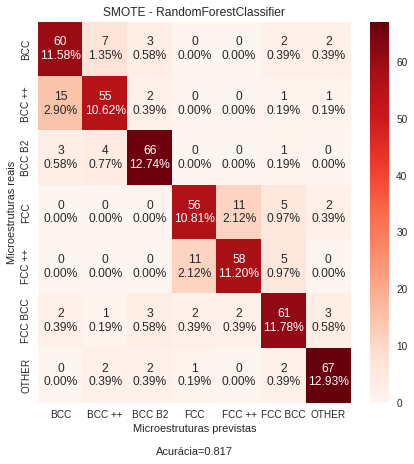

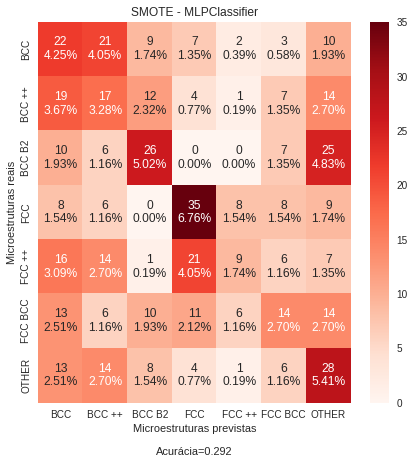

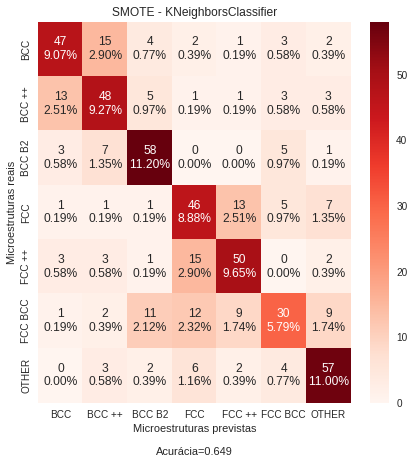

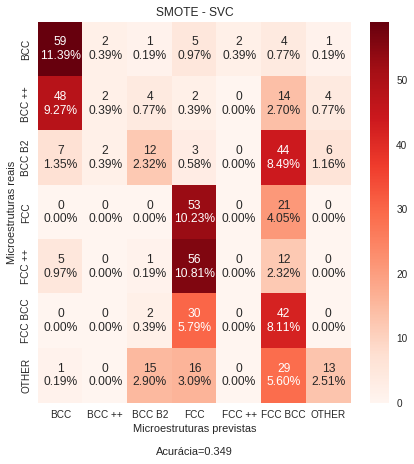

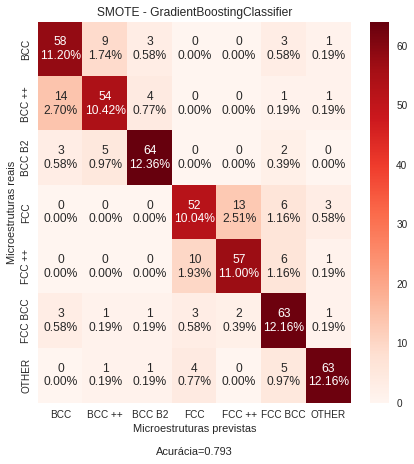

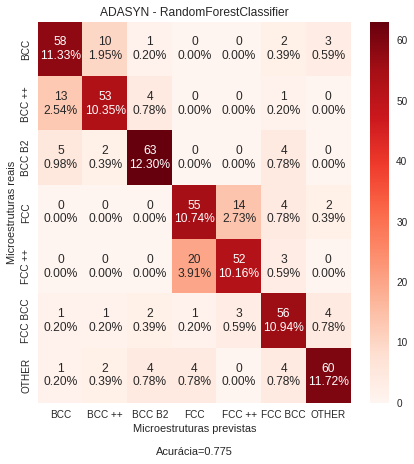

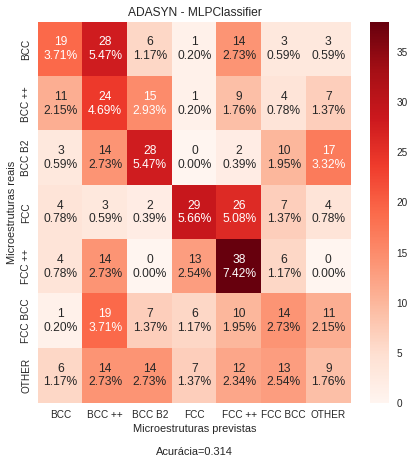

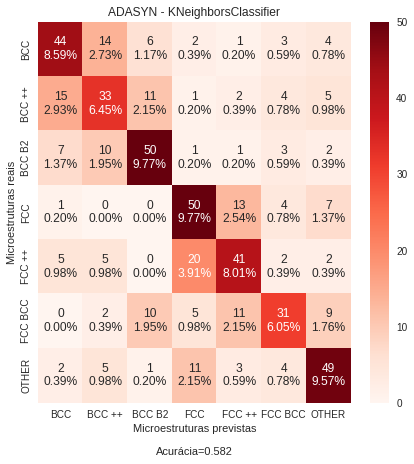

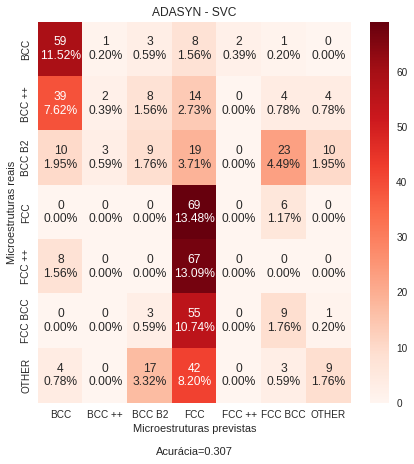

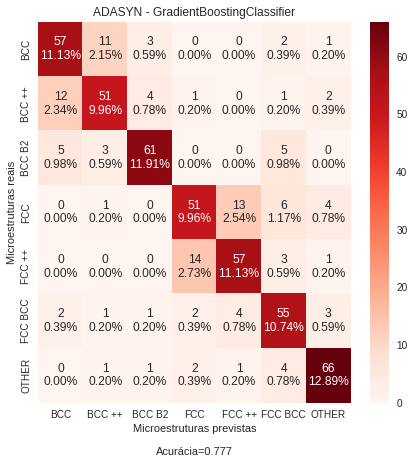

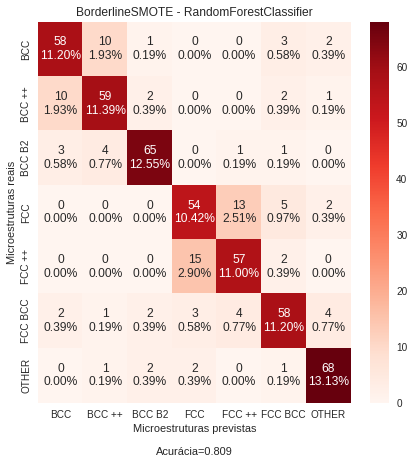

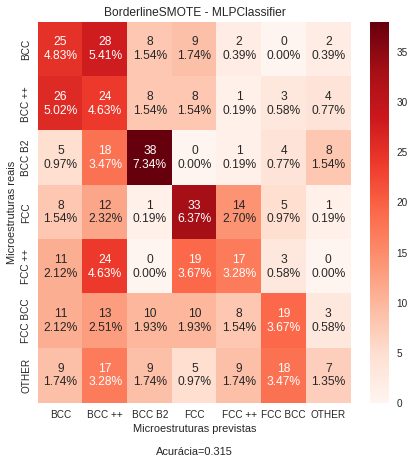

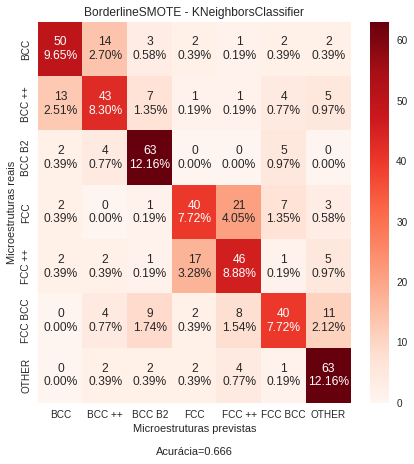

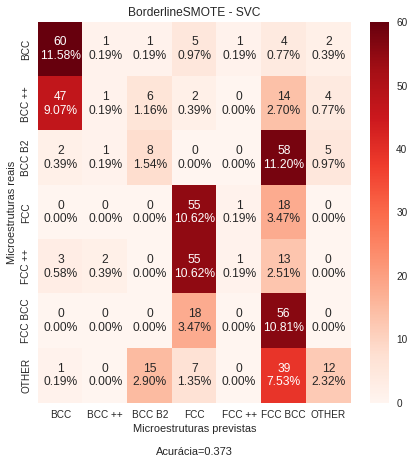

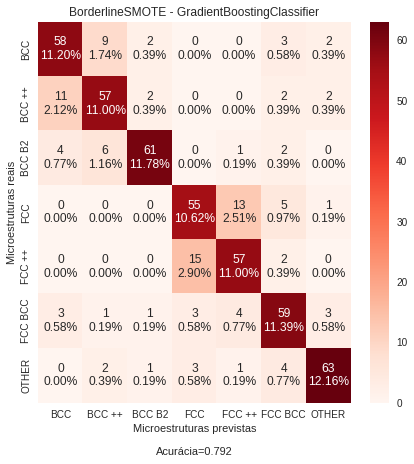

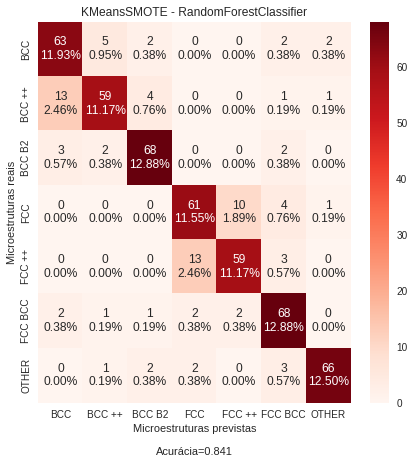

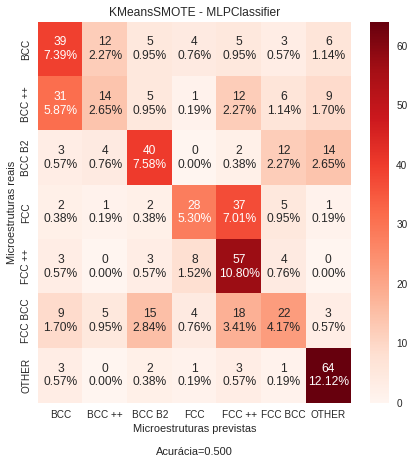

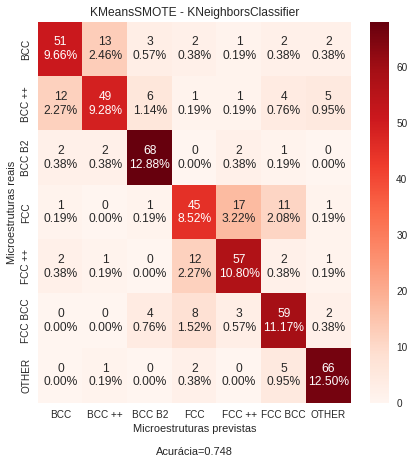

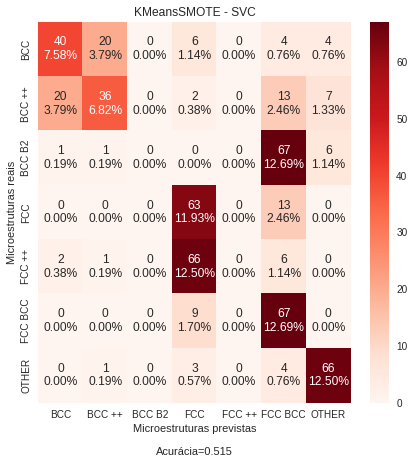

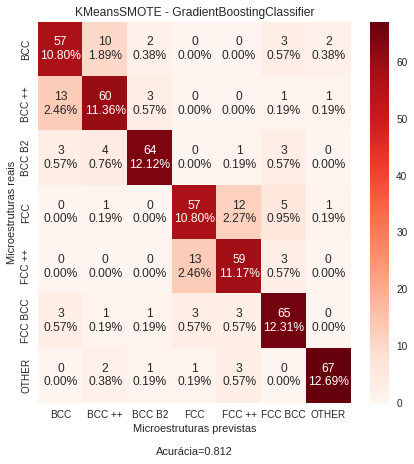

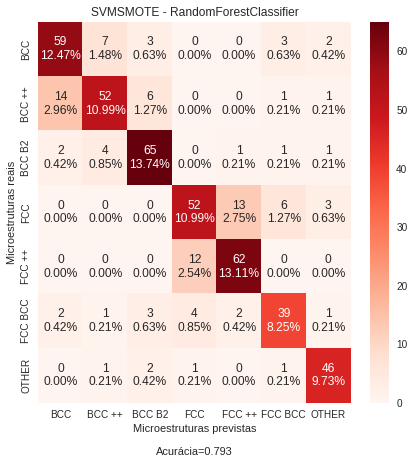

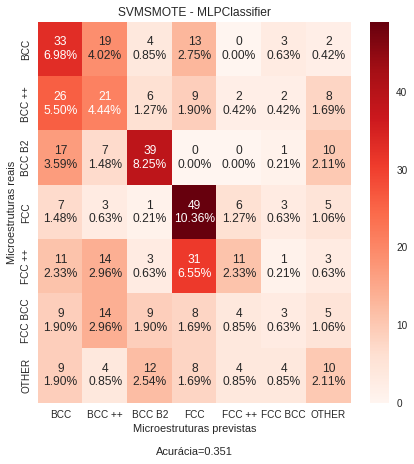

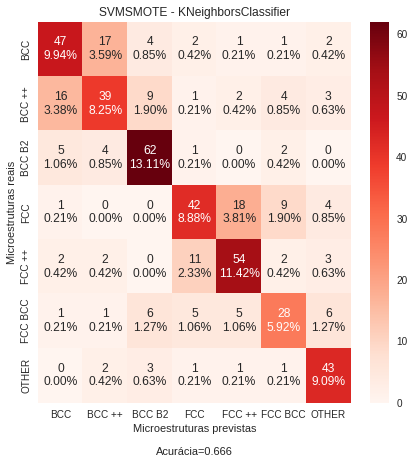

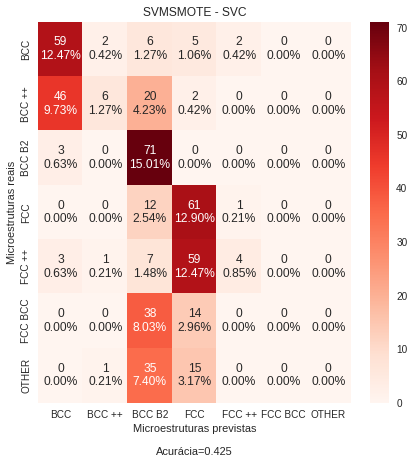

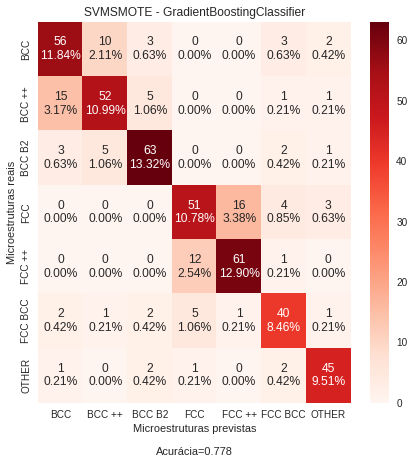

In [ ]:
# properties_oversampled, microstructure_oversampled
cm_microstructure_oversampled = {}

for oversampled in data_oversampled.keys():
  for model in models:
    model_name = str(model.__class__.__name__)
    microstructure_pred_oversampled = cross_val_predict(
        model, 
        data_oversampled[oversampled]['properties_train_oversampled'], 
        data_oversampled[oversampled]['microstructure_train_oversampled'],
        cv=k_folds
      )

    microstructure_multilabel_confusion_matrix_oversampled = \
      multilabel_confusion_matrix(
          data_oversampled[oversampled]['microstructure_train_oversampled'], 
          microstructure_pred_oversampled
      )
    
    microstructure_confusion_matrix_oversampled = \
      confusion_matrix(
          data_oversampled[oversampled]['microstructure_train_oversampled'], 
          microstructure_pred_oversampled
      )

    clf_report_oversampled = classification_report(
        data_oversampled[oversampled]['microstructure_train_oversampled'], 
        microstructure_pred_oversampled,
        output_dict=True
      )

    # transform column index number to microstructure
    clf_report_oversampled = {
        (inverse_transform_microstructure(k) 
        if is_float(k) else k):v 
        for (k,v) in clf_report_oversampled.items()
      }

    df_classification_report_oversampled = pd.DataFrame(
        clf_report_oversampled
      ).transpose()

    print('Sampler: ',oversampled, 'Model: ', model_name)
    print(df_classification_report_oversampled)

    cm_microstructure_oversampled[oversampled] = \
      microstructure_confusion_matrix_oversampled

    make_confusion_matrix(microstructure_confusion_matrix_oversampled, 
                          figsize=(7,7), 
                          categories=microstructures,cmap='Reds',
                          title=f'{oversampled} - {model_name}')


Sampler:  SMOTE Model:  RandomForestClassifier
              precision    recall  f1-score     support
BCC            0.769231  0.810811  0.789474   74.000000
BCC ++         0.797101  0.743243  0.769231   74.000000
BCC B2         0.891892  0.891892  0.891892   74.000000
FCC            0.783784  0.783784  0.783784   74.000000
FCC ++         0.802817  0.770270  0.786207   74.000000
FCC BCC        0.828947  0.851351  0.840000   74.000000
OTHER          0.921053  0.945946  0.933333   74.000000
accuracy       0.828185  0.828185  0.828185    0.828185
macro avg      0.827832  0.828185  0.827703  518.000000
weighted avg   0.827832  0.828185  0.827703  518.000000
Sampler:  SMOTE Model:  MLPClassifier
              precision    recall  f1-score     support
BCC            0.702703  0.702703  0.702703   74.000000
BCC ++         0.679245  0.486486  0.566929   74.000000
BCC B2         0.700000  0.851351  0.768293   74.000000
FCC            0.645161  0.540541  0.588235   74.000000
FCC ++         0.66

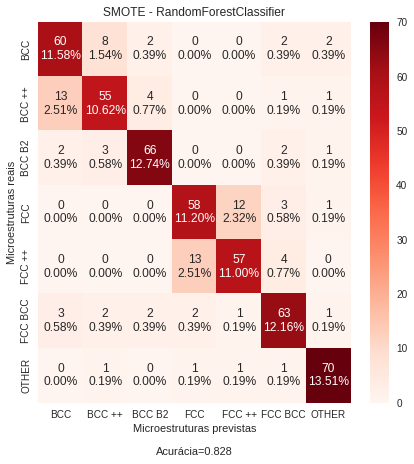

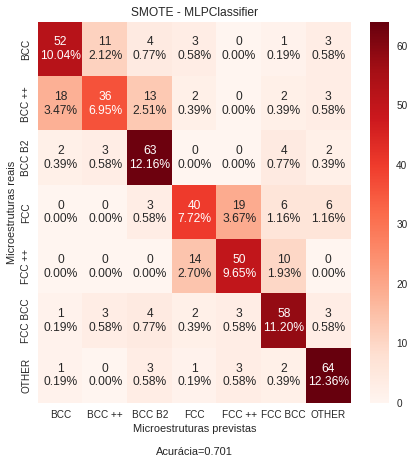

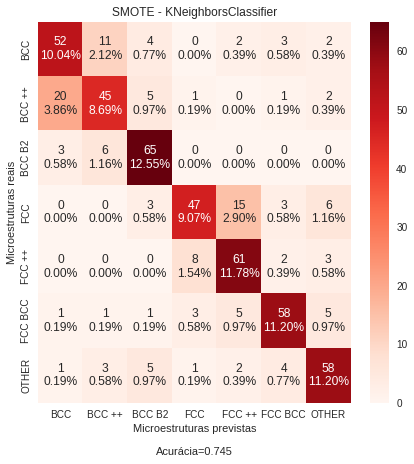

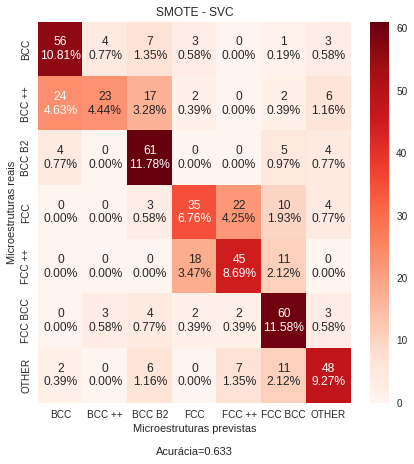

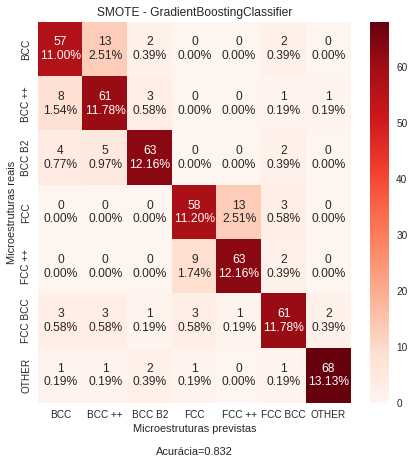

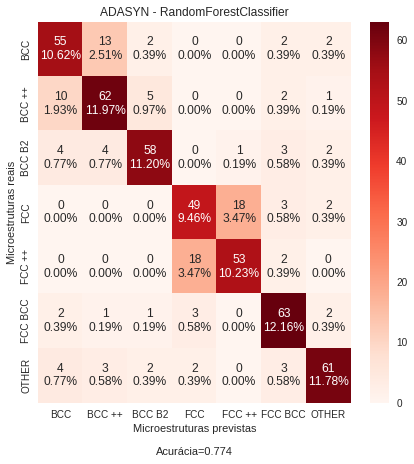

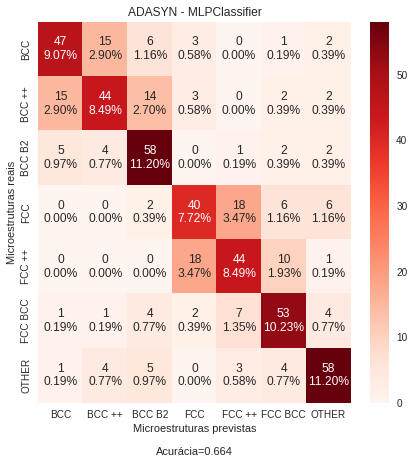

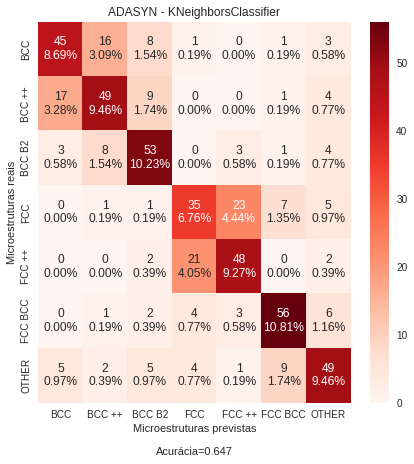

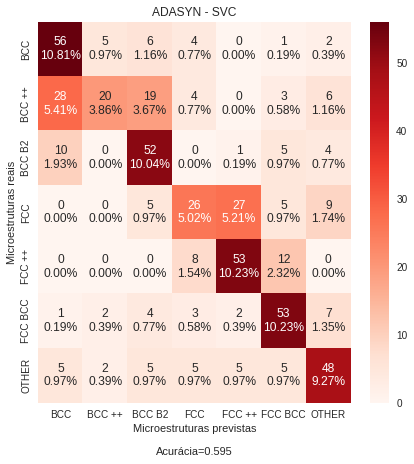

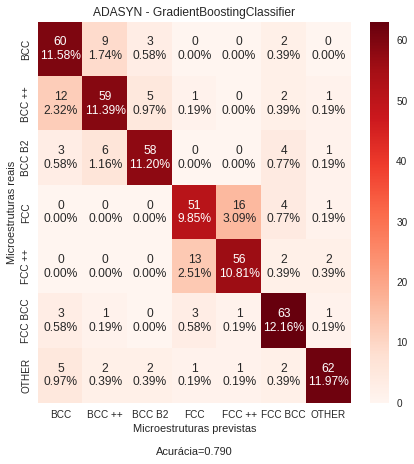

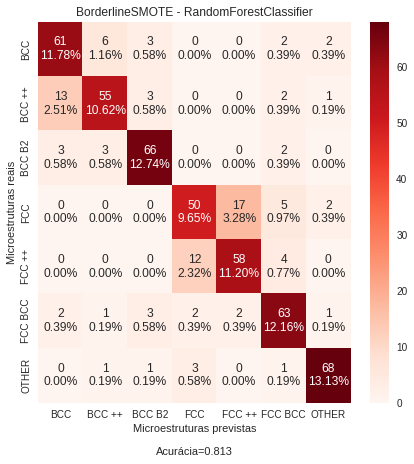

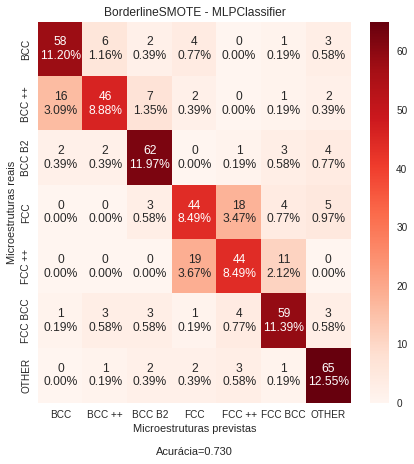

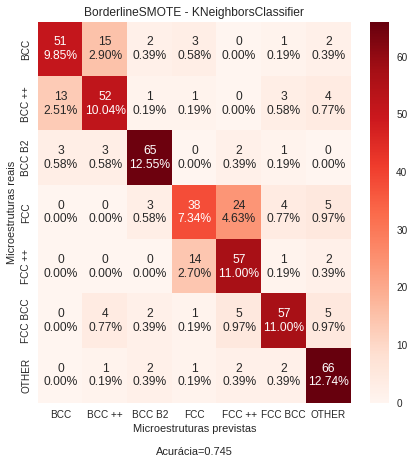

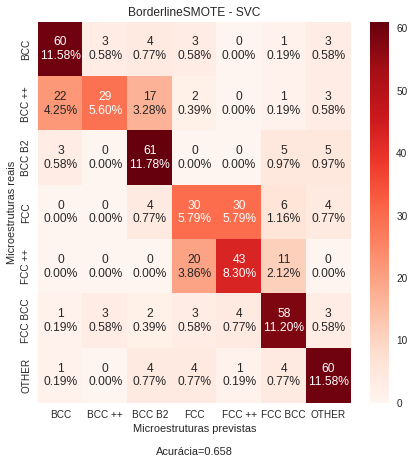

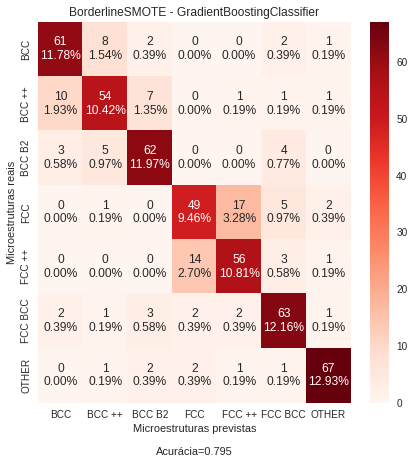

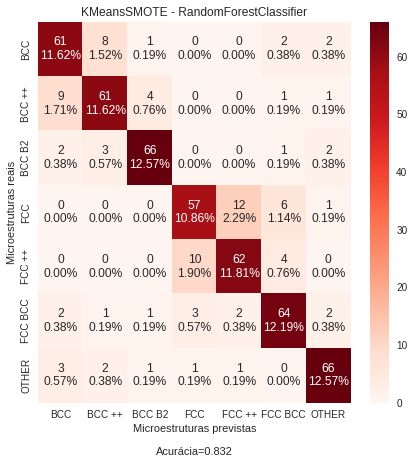

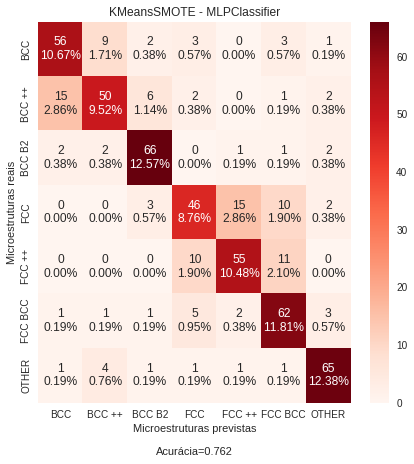

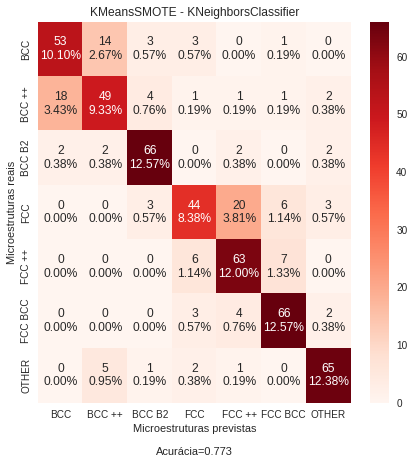

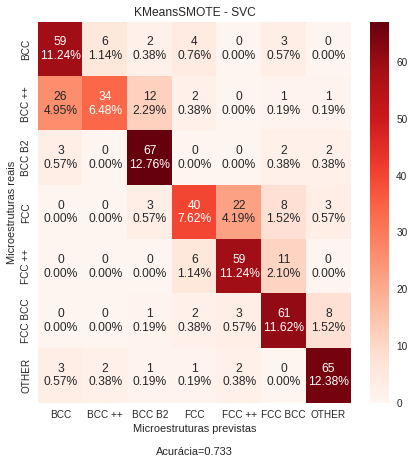

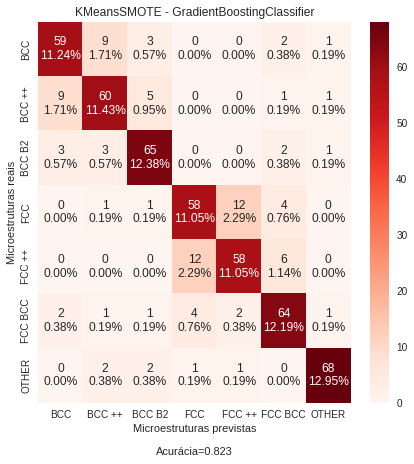

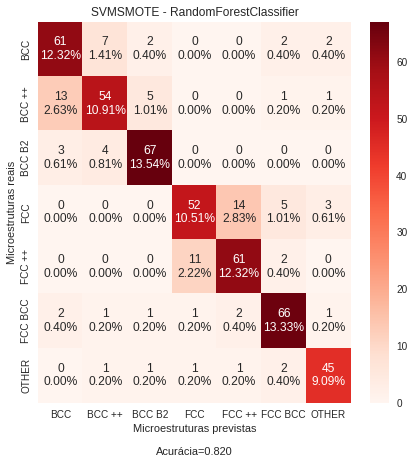

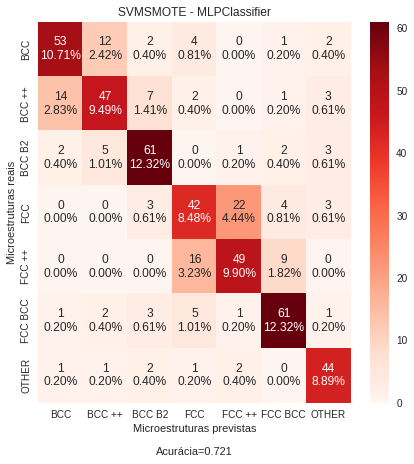

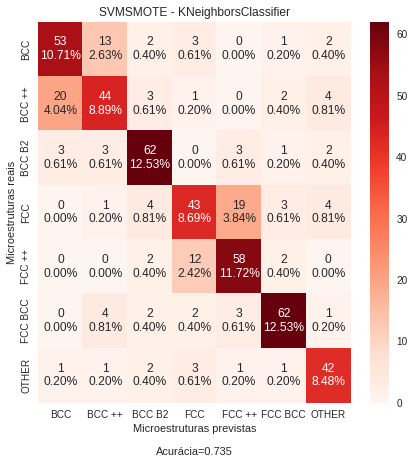

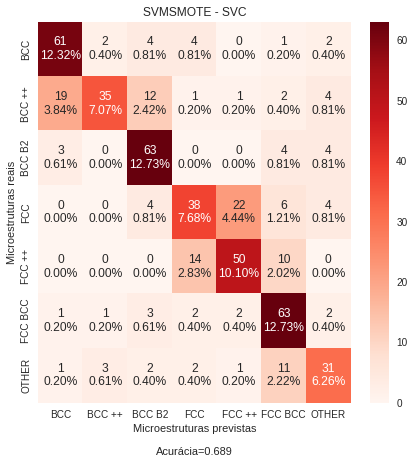

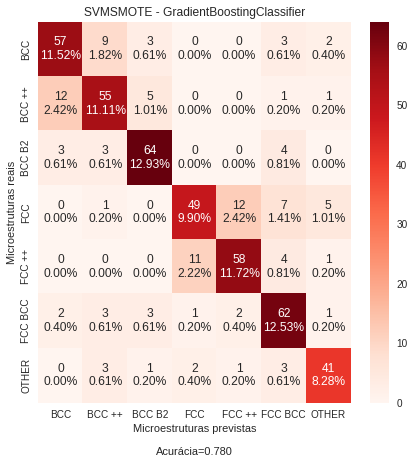

In [ ]:


# properties_oversampled, microstructure_oversampled
cm_microstructure_oversampled = {}

for oversampled in data_normalized_oversampled.keys():
  for model in models:
    model_name = str(model.__class__.__name__)
    microstructure_pred_oversampled = cross_val_predict(
        model, 
        data_normalized_oversampled[oversampled]['properties_train_oversampled'], 
        data_normalized_oversampled[oversampled]['microstructure_train_oversampled'],
        cv=k_folds
      )

    microstructure_multilabel_confusion_matrix_oversampled = \
      multilabel_confusion_matrix(
          data_normalized_oversampled[oversampled]['microstructure_train_oversampled'], 
          microstructure_pred_oversampled
      )
    
    microstructure_confusion_matrix_oversampled = \
      confusion_matrix(
          data_normalized_oversampled[oversampled]['microstructure_train_oversampled'], 
          microstructure_pred_oversampled
      )

    clf_report_oversampled = classification_report(
        data_normalized_oversampled[oversampled]['microstructure_train_oversampled'], 
        microstructure_pred_oversampled,
        output_dict=True
      )

    # transform column index number to microstructure
    clf_report_oversampled = {
        (inverse_transform_microstructure(k) 
        if is_float(k) else k):v 
        for (k,v) in clf_report_oversampled.items()
      }

    df_classification_report_oversampled = pd.DataFrame(
        clf_report_oversampled
      ).transpose()

    print('Sampler: ',oversampled, 'Model: ', model_name)
    print(df_classification_report_oversampled)

    cm_microstructure_oversampled[oversampled] = \
      microstructure_confusion_matrix_oversampled

    make_confusion_matrix(microstructure_confusion_matrix_oversampled, 
                          figsize=(7,7), 
                          categories=microstructures,cmap='Reds',
                          title=f'{oversampled} - {model_name}')


Sampler:  SMOTE  Model:  RandomForestClassifier
              precision    recall  f1-score     support
BCC            0.789474  0.909091  0.845070   33.000000
BCC ++         0.750000  0.562500  0.642857   16.000000
BCC B2         0.625000  0.555556  0.588235    9.000000
FCC            0.666667  0.555556  0.606061   18.000000
FCC ++         0.785714  0.611111  0.687500   18.000000
FCC BCC        0.600000  0.923077  0.727273   13.000000
OTHER          0.750000  0.750000  0.750000    8.000000
accuracy       0.721739  0.721739  0.721739    0.721739
macro avg      0.709551  0.695270  0.692428  115.000000
weighted avg   0.727135  0.721739  0.714833  115.000000
Sampler:  SMOTE  Model:  MLPClassifier
              precision    recall  f1-score     support
BCC            0.805556  0.878788  0.840580   33.000000
BCC ++         0.750000  0.562500  0.642857   16.000000
BCC B2         0.625000  0.555556  0.588235    9.000000
FCC            0.562500  0.500000  0.529412   18.000000
FCC ++         0.

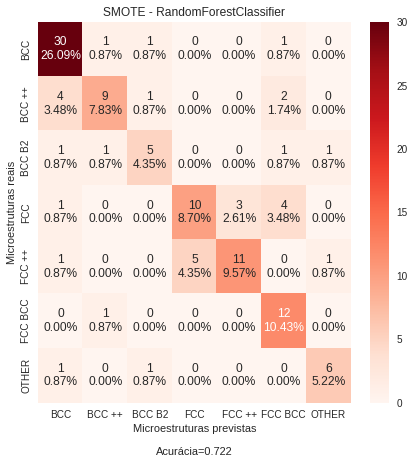

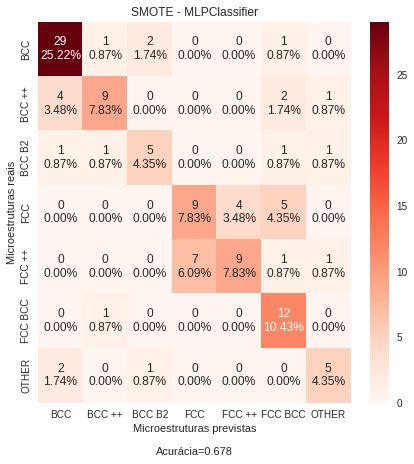

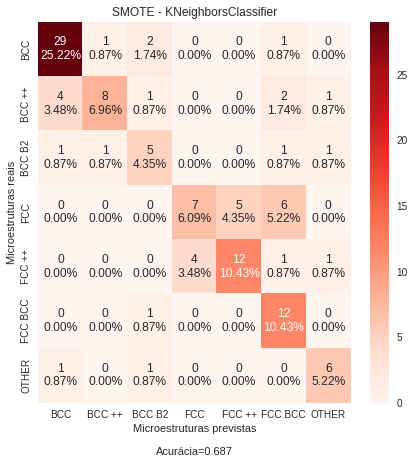

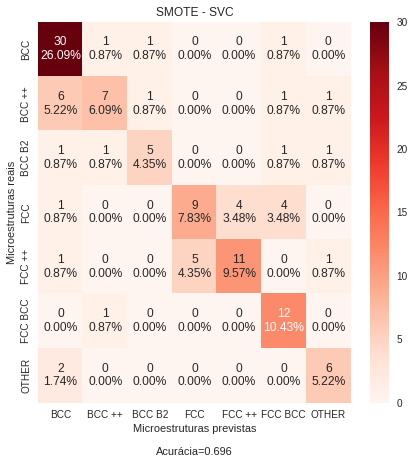

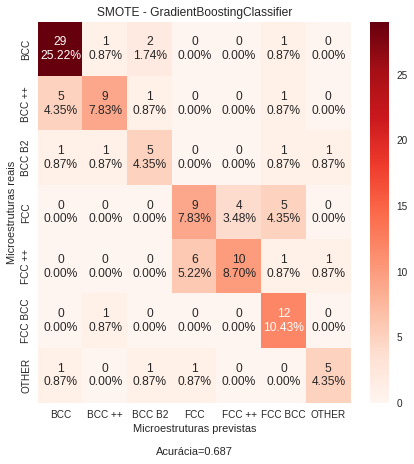

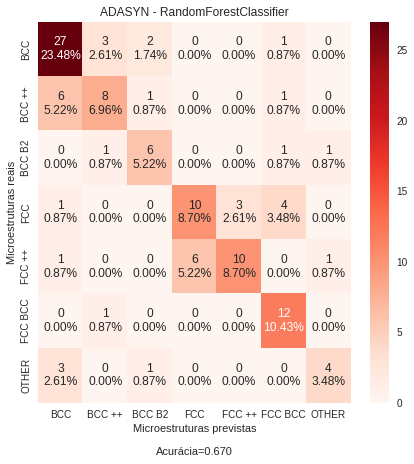

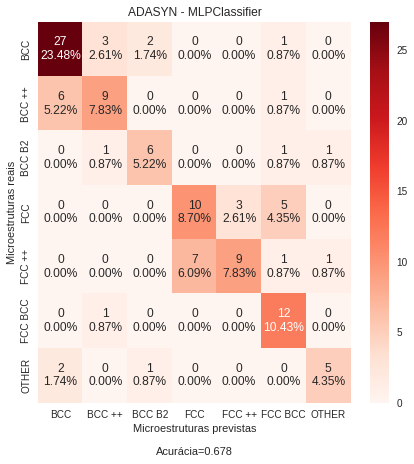

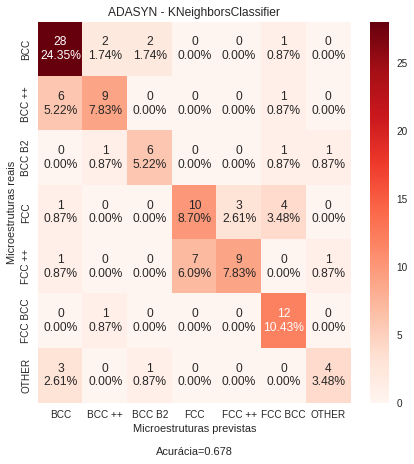

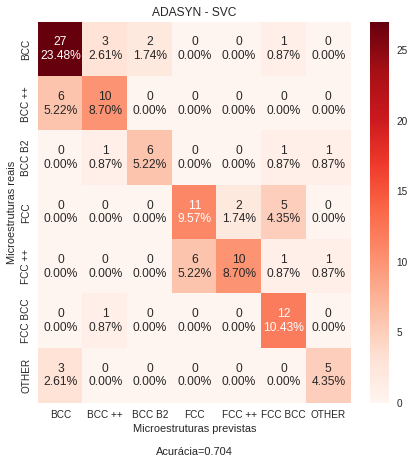

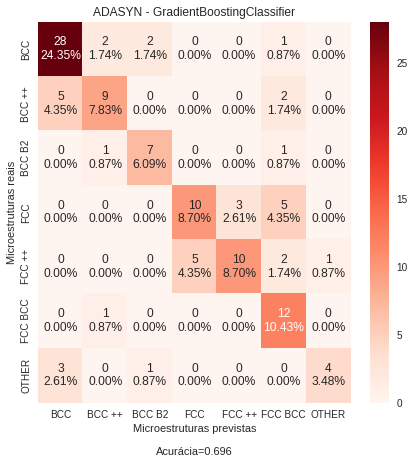

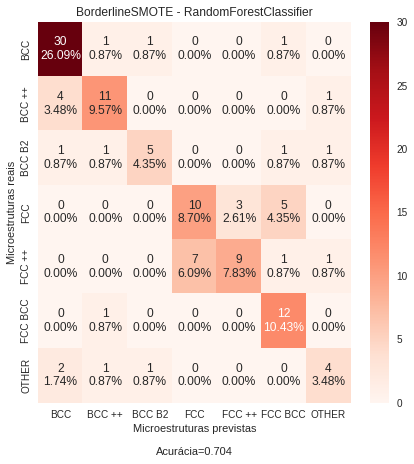

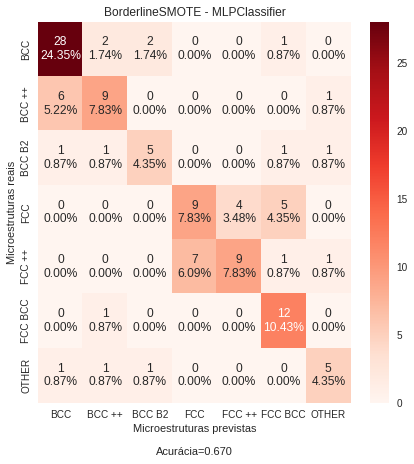

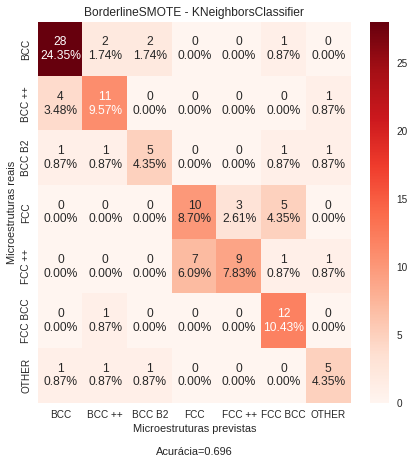

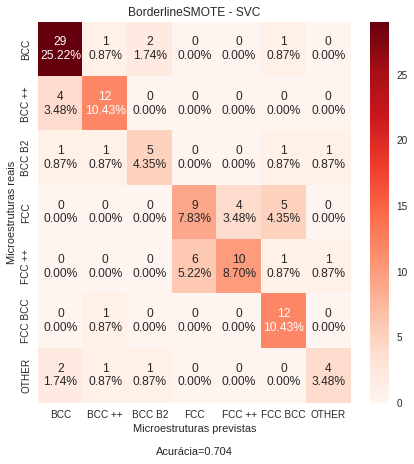

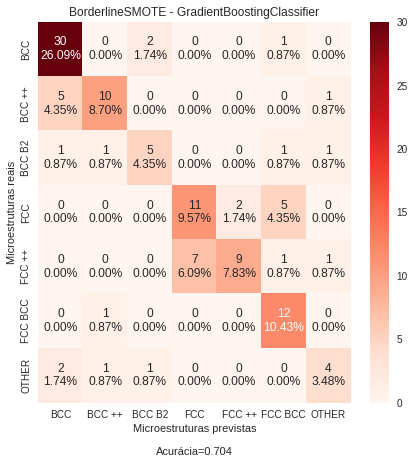

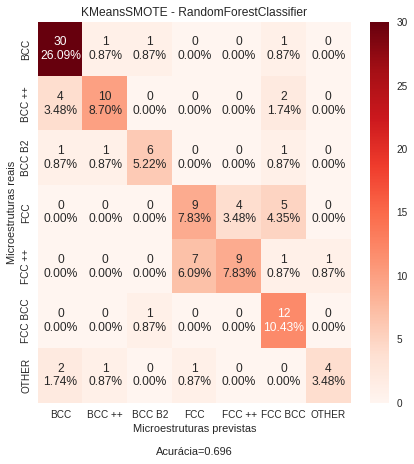

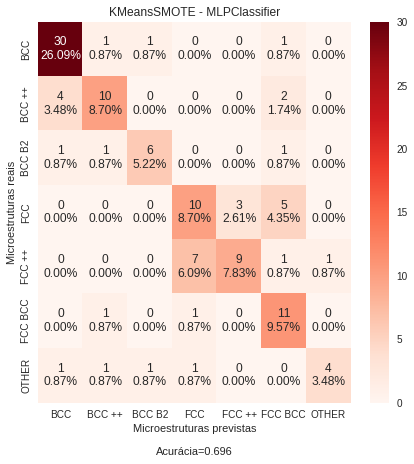

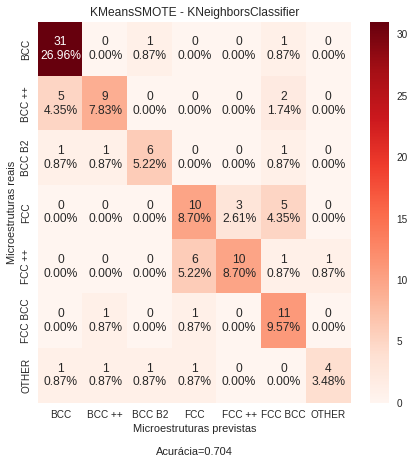

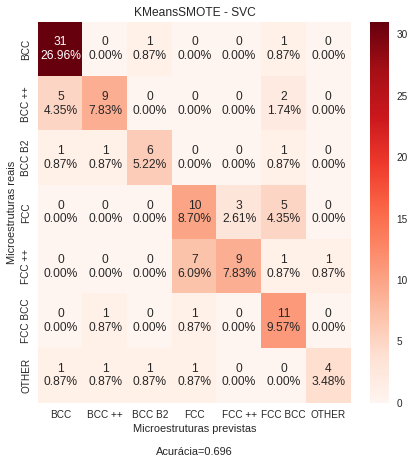

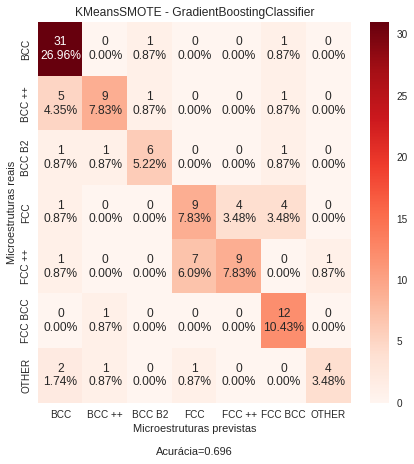

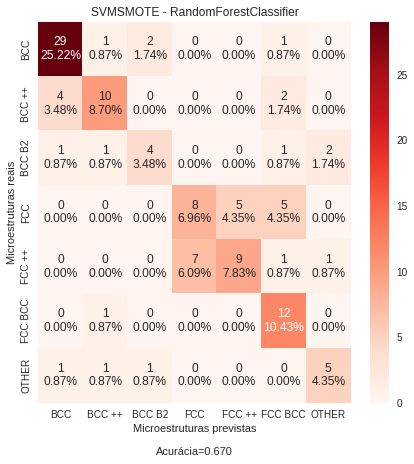

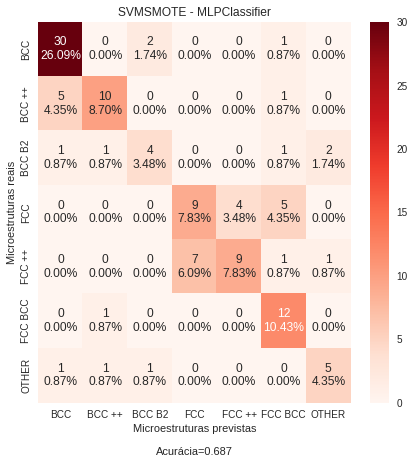

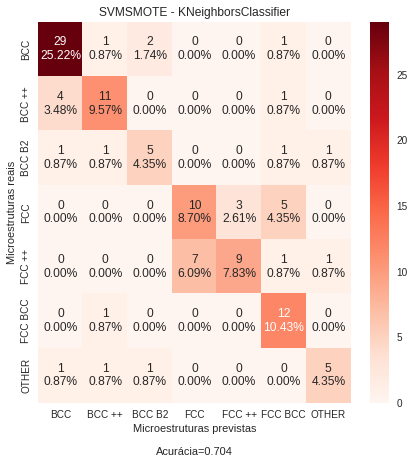

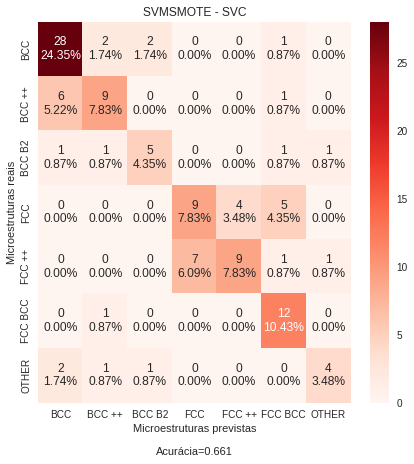

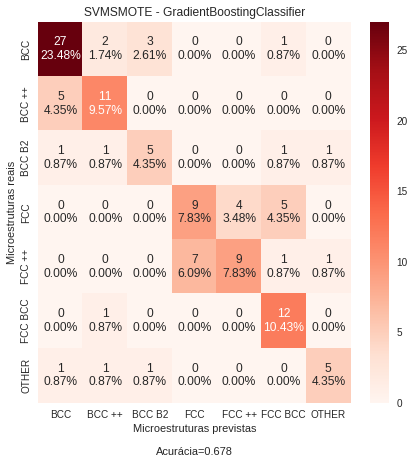

In [ ]:
default_forest = RandomForestClassifier()

cm_microstructure_oversampled_homolog = {}

for oversampled in data_oversampled.keys():

  for model in models:
  
    model_name = str(model.__class__.__name__)

    homolog_fit = default_forest.fit(
        data_oversampled[oversampled]['properties_train_oversampled'], 
        data_oversampled[oversampled]['microstructure_train_oversampled']
        )

    caracteristic_homolog_pred = homolog_fit.predict(x_test_droped_duplicates)

    clf_report_oversampled_homolog = classification_report(
        y_test_droped_duplicates, 
        caracteristic_homolog_pred,
        output_dict=True
      )

    # transform column index number to microstructure
    clf_report_oversampled_homolog = {
        (inverse_transform_microstructure(k) 
        if is_float(k) else k):v 
        for (k,v) in clf_report_oversampled_homolog.items()
      }

    df_classification_report_oversampled_homolog = pd.DataFrame(
        clf_report_oversampled_homolog
      ).transpose()

    print('Sampler: ',oversampled, ' Model: ', model_name)
    print(df_classification_report_oversampled_homolog)

    # print(oversampled)

    cm_microstructure_oversampled_homolog[oversampled] = confusion_matrix(
        y_test_droped_duplicates, 
        caracteristic_homolog_pred,
    )

    make_confusion_matrix(cm_microstructure_oversampled_homolog[oversampled], 
                          figsize=(7,7), 
                          categories=microstructures,cmap='Reds',
                          title=f'{oversampled} - {model_name}')
    

Criando o modelo

In [ ]:
# x_train_normalized,
# y_train_normalized,

# x_test_normalized,
# y_test_normalized

In [ ]:
data_oversampled.keys()

# print(data_oversampled['KMeansSMOTE']['microstructure_train_oversampled'])
# print(data_oversampled['KMeansSMOTE']['properties_train_oversampled'])

# melhor sobreamostragem -> KMeansSMOTE
# melhor modelo -> SVM
# após homologar a acuracia cai bastante, provavel overfit 

dict_keys(['SMOTE', 'ADASYN', 'BorderlineSMOTE', 'KMeansSMOTE', 'SVMSMOTE'])


 Model:  RandomForestClassifier
              precision    recall  f1-score     support
BCC            0.765432  0.837838  0.800000   74.000000
BCC ++         0.852941  0.743590  0.794521   78.000000
BCC B2         0.906667  0.906667  0.906667   75.000000
FCC            0.780488  0.842105  0.810127   76.000000
FCC ++         0.852941  0.773333  0.811189   75.000000
FCC BCC        0.807229  0.881579  0.842767   76.000000
OTHER          0.929577  0.891892  0.910345   74.000000
accuracy       0.839015  0.839015  0.839015    0.839015
macro avg      0.842182  0.839572  0.839374  528.000000
weighted avg   0.842040  0.839015  0.839010  528.000000

 Model:  MLPClassifier
              precision    recall  f1-score     support
BCC            0.769231  0.810811  0.789474   74.000000
BCC ++         0.816901  0.743590  0.778523   78.000000
BCC B2         0.894737  0.906667  0.900662   75.000000
FCC            0.780488  0.842105  0.810127   76.000000
FCC ++         0.855072  0.786667  0.819444   7

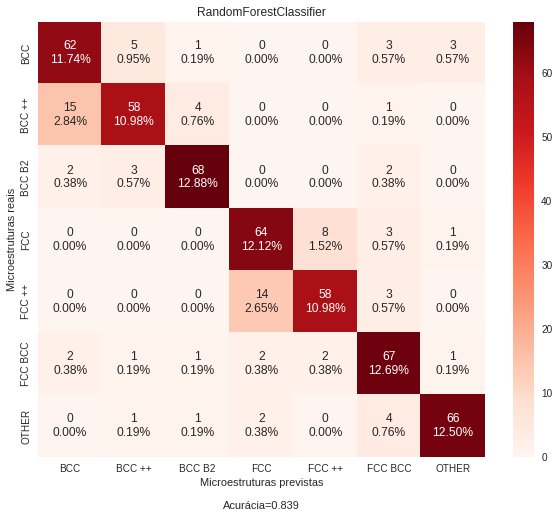

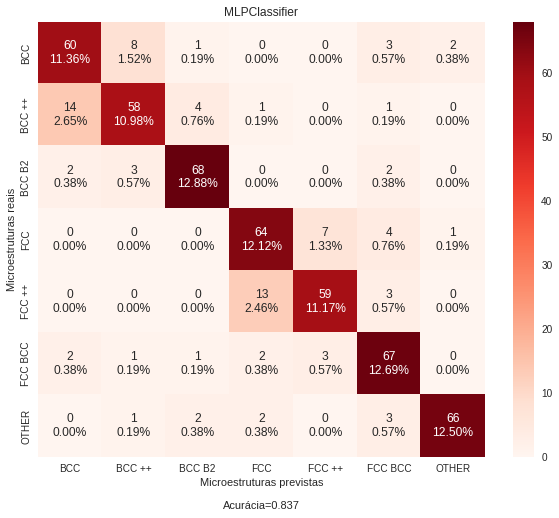

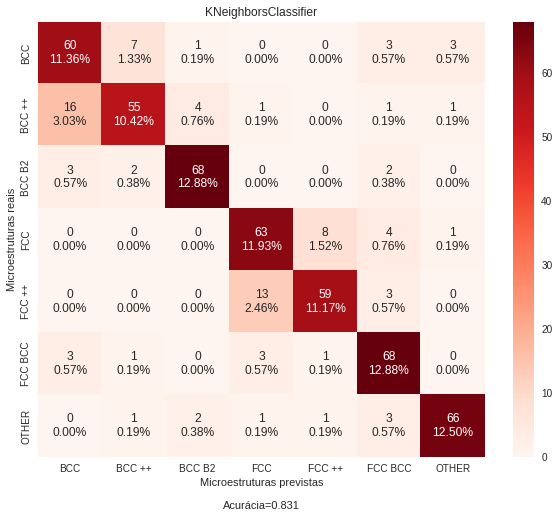

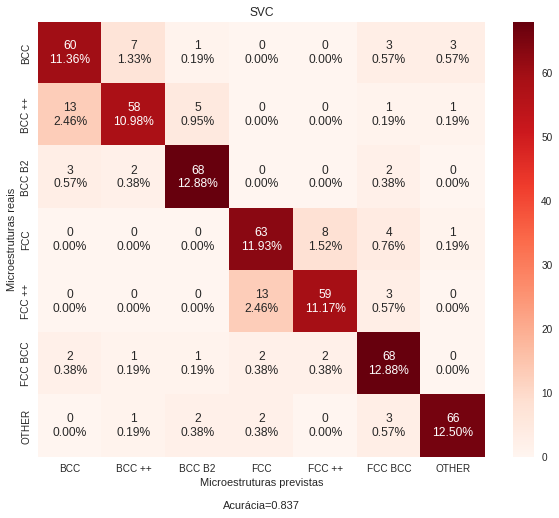

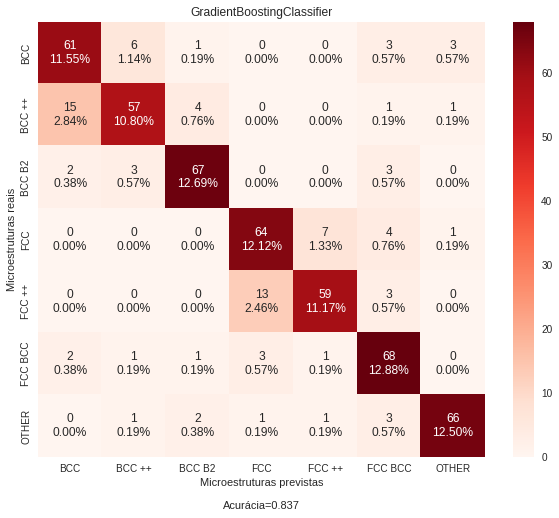

In [ ]:
# now, create a list with the objects 
models= [
  forest, 
  mlp, 
  knn, 
  svm,
  gboost
]

# df_accuracy_pstdev_normalized = pd.DataFrame({'model':[],'means':[],'pstdev':[]})

cm_microstructure_models_KMeansSMOTE = {}

for model in models:

  # x_train_normalized,
  # y_train_normalized,

  # x_test_normalized,
  # y_test_normalized


  microstructure_pred = cross_val_predict(
      default_forest,
      data_oversampled['KMeansSMOTE']['properties_train_oversampled'],
      data_oversampled['KMeansSMOTE']['microstructure_train_oversampled'],
      cv=k_folds 
    )

  microstructure_multilabel_confusion_matrix = \
    multilabel_confusion_matrix(
        data_oversampled['KMeansSMOTE']['microstructure_train_oversampled'],
        microstructure_pred
    )
  
  microstructure_confusion_matrix = \
    confusion_matrix(
        data_oversampled['KMeansSMOTE']['microstructure_train_oversampled'],
        microstructure_pred
    )

  clf_report = classification_report(
      data_oversampled['KMeansSMOTE']['microstructure_train_oversampled'],
      microstructure_pred,
      output_dict=True
    )

  # transform column index number to microstructure
  clf_report = {
      (inverse_transform_microstructure(k) 
      if is_float(k) else k):v 
      for (k,v) in clf_report.items()
    }

  df_classification_report = pd.DataFrame(
      clf_report
    ).transpose()

  model_name = str(model.__class__.__name__)

  print('\n Model: ', model_name)
  print(df_classification_report)

  cm_microstructure_models_KMeansSMOTE[model_name] = \
    microstructure_confusion_matrix

  make_confusion_matrix(microstructure_confusion_matrix, 
                        figsize=(10,8), 
                        categories=microstructures,cmap='Reds',
                        title=model_name)


# cm_microstructure_droped_duplicates_normalized = confusion_matrix(
#       microstructure_droped_duplicates.values.reshape(-1,), 
#       microstructure_pred_droped_duplicates_normalized
#   )
  # ------------------------------------------------

# print(df_accuracy_pstdev_normalized)


  




 Model:  RandomForestClassifier
              precision    recall  f1-score     support
BCC            0.810811  0.909091  0.857143   33.000000
BCC ++         0.769231  0.625000  0.689655   16.000000
BCC B2         0.666667  0.666667  0.666667    9.000000
FCC            0.555556  0.555556  0.555556   18.000000
FCC ++         0.750000  0.500000  0.600000   18.000000
FCC BCC        0.545455  0.923077  0.685714   13.000000
OTHER          0.750000  0.375000  0.500000    8.000000
accuracy       0.695652  0.695652  0.695652    0.695652
macro avg      0.692531  0.650627  0.650676  115.000000
weighted avg   0.710047  0.695652  0.687256  115.000000



 Model:  MLPClassifier
              precision    recall  f1-score     support
BCC            0.709677  0.666667  0.687500   33.000000
BCC ++         0.000000  0.000000  0.000000   16.000000
BCC B2         0.363636  0.444444  0.400000    9.000000
FCC            0.451613  0.777778  0.571429   18.000000
FCC ++         0.000000  0.000000  0.000000  

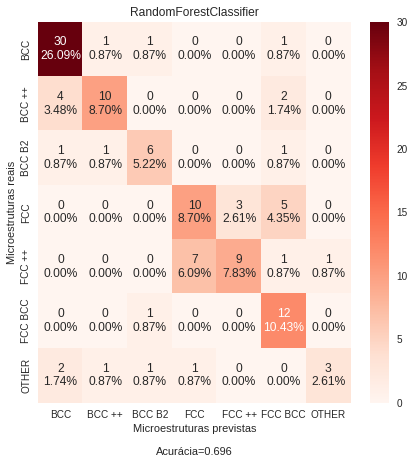

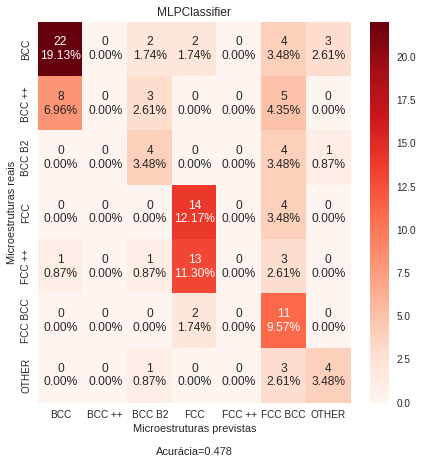

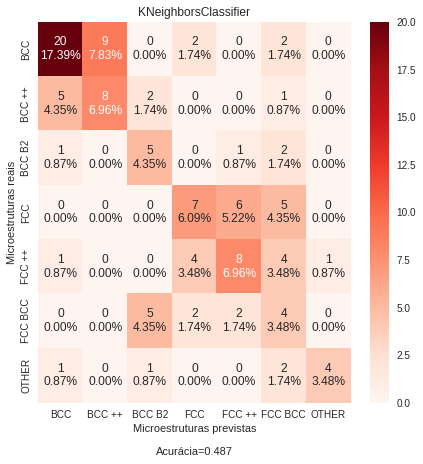

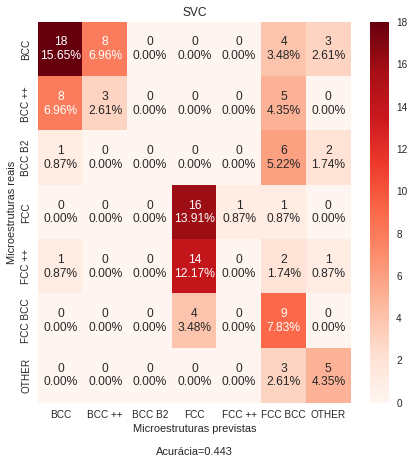

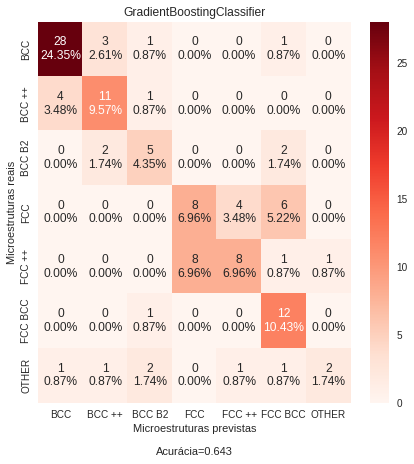

In [ ]:

cm_microstructure_models_KMeansSMOTE_hml = {}

for model in models:

  # x_train_normalized,
  # y_train_normalized,

  # x_test_normalized,
  # y_test_normalized


  homolog_fit = model.fit(
      data_oversampled['KMeansSMOTE']['properties_train_oversampled'],
      data_oversampled['KMeansSMOTE']['microstructure_train_oversampled'], 
    )
  

  caracteristic_homolog_pred = homolog_fit.predict(x_test_droped_duplicates)

  clf_report_oversampled_homolog = classification_report(
      y_test_droped_duplicates, 
      caracteristic_homolog_pred,
      output_dict=True
    )

  # transform column index number to microstructure
  clf_report_oversampled_homolog = {
      (inverse_transform_microstructure(k) 
      if is_float(k) else k):v 
      for (k,v) in clf_report_oversampled_homolog.items()
    }

  df_classification_report_oversampled_homolog = pd.DataFrame(
      clf_report_oversampled_homolog
    ).transpose()

  model_name = str(model.__class__.__name__)

  print('\n Model: ',model_name)
  print(df_classification_report_oversampled_homolog)


  cm_microstructure_models_KMeansSMOTE_hml[model_name] = confusion_matrix(
      y_test_droped_duplicates, 
      caracteristic_homolog_pred,
  )

  make_confusion_matrix(cm_microstructure_models_KMeansSMOTE_hml[model_name], 
                        figsize=(7,7), 
                        categories=microstructures,cmap='Reds',
                        title=model_name)

  print('\n')

In [ ]:
# microstructure_confusion_matrix

In [ ]:
{'model': 'RandomForestClassifier', 'means': 0.628, 'pstdev': 0.095}
{'model': 'GradientBoostingClassifier', 'means': 0.642, 'pstdev': 0.075}

{'means': 0.642, 'model': 'GradientBoostingClassifier', 'pstdev': 0.075}

# Verificando Acuracia, recall, f1 score

In [ ]:
# 
models= [
         forest, 
        #  mlp, 
         knn, 
         svm,
         gboost
         ]

# df_accuracy_pstdev_normalized = pd.DataFrame({'model':[],'means':[],'pstdev':[]})

for model in models:

  scores = cross_val_score(
      model,
      x_train, y_train.values.reshape(-1,),
      cv=10
      )
  accuracy_cross = round(mean(scores),3)

  dp_cross = round(pstdev(scores),3)
  # accuracy_cross = 0

  model.fit(x_train, y_train.values.reshape(-1,)) # fit the model
  y_pred= model.predict(x_test) # then predict on the test set

  matriz = multilabel_confusion_matrix(y_test, y_pred)

  cm = confusion_matrix(y_test, y_pred)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cm_p = cm.diagonal()/cm.sum(axis=1)

  accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
  clf_report= classification_report(y_test, y_pred, output_dict=True) # with the report, we have a bigger picture, with precision and recall for each class

  df_out = pd.DataFrame(clf_report).transpose()

  # print(f"Acuracia treino/teste {type(model).__name__} is {accuracy:.2f}")
  print(f"Acuracia treino {type(model).__name__} is {accuracy_cross:.3f}")
  print(f"Desvio padrao treino {type(model).__name__} is {dp_cross:.3f}")

  print(cm_p)
  print(df_out)


  complemento = [accuracy_cross,0,0]

  accuracy_insert = cm_p.tolist() + complemento

  df_out["accuracy"] = accuracy_insert
  df_out.insert(0, "PROPERTY: Microstructure", df_out.index, True)
  # df_out1['PROPERTY: Microstructure'] = microstructure_ord_enc.inverse_transform(df_out1[['PROPERTY: Microstructure']])


  # df_out.to_csv(
  #     f'resultados {type(model).__name__} .csv', 
  #     index = False, 
  #     header=True
  #   )
 
    # print("\n")

NameError: ignored

In [ ]:
# df_out['PROPERTY: Microstructure'][:5] = microstructure_ord_enc.inverse_transform(df_out['PROPERTY: Microstructure'][:7].values.reshape(-1,1))

# df_out['PROPERTY: Microstructure'][:7].values.reshape(-1,)
# a = microstructure_ord_enc.inverse_transform(df_out[['PROPERTY: Microstructure']])
# a

df_out1 = df_out[:7]
df_out1['PROPERTY: Microstructure'] = microstructure_ord_enc.inverse_transform(df_out1[['PROPERTY: Microstructure']])
df_out1

In [ ]:
# mostrar acuracia
# f1 score
# e matriz de confusao

model = MLPClassifier(
    random_state=54, 
    max_iter=500,
    solver="adam",
    # hidden_layer_sizes = (100),
    # activation = "relu",
    # batch_size = 200,
    # learning_rate_init = 0.001,
    # tol = 0.000010
    )

accuracy_cross = 0

matriz = multilabel_confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_p = cm.diagonal()/cm.sum(axis=1)



model.fit(x_train, y_train) # fit the model
y_pred= model.predict(x_test) # then predict on the test set
accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
clf_report= classification_report(y_test, y_pred, output_dict=True) # with the report, we have a bigger picture, with precision and recall for each class

df_out = pd.DataFrame(clf_report).transpose()

print(f"Acuracia treino/teste {type(model).__name__} is {accuracy:.2f}")

complemento = [accuracy_cross,0,0]

accuracy_insert = cm_p.tolist() + complemento

df_out["accuracy"] = accuracy_insert
df_out.insert(0, "Microstructure", df_out.index, True)

# microstructure_ord_enc.inverse_transform(df[['PROPERTY: Microstructure']])

print(df_out)

In [ ]:
grupos = list(set(agrupado))
print(grupos)


# for i in range(len(properties)):



In [ ]:

# plt.scatter(properties[:, 0], properties[:, 1])

import matplotlib.pyplot as plt

fig, ax = pyplot.subplots()

pyplot.show()



# plt.scatter(range(len(agrupado)), agrupado)

# plt.show()

In [ ]:
print(properties[:])

print(df)

In [ ]:
# lixo


  

  # arr = np.append(arr, np.array([scores]), axis=0)
  
    # df_teste.append(pd.DataFrame(data =arr))

    # df_teste.append(pd.DataFrame(arr.reshape(1,-1), columns=list(df_teste)), ignore_index=True)

  # print(arr)

  
  # df_teste.append(pd.DataFrame(arr, columns=colunas))

    # A = np.vstack(A, scores)
    # print(A)
    # print(scores)
    # np.concatenate((A, scores), axis=0)
  #   medias.append({'media':round(100*mean(scores),3),
  #                 'desvio_padrao': round(100*pstdev(scores),3)})

  #   # print(f'------N:{q}-------\n')
  #   # print('--------Dados não normalizados---------\n')
  #   # print(f'typo:{type(scores)} scores: {scores}\n', 
  #   #       f'acurácia média: {round(100*mean(scores),2)}% \n'
  #   # )
    
    
    
  #   
    
  #   df_teste['media'] = round(100*mean(scores),2)
  #   df_teste['desvio_padrao'] = round(100*pstdev(scores),2)

  # print([f'teste{i+1}' for i in range(q)])
  # print(scores)
  # print('---------Dados normalizados---------\n')
  # scores = cross_val_score(
  #         clf,
  #         normalized_properties,
  #         microstructure.ravel(),
  #         cv=q
  # )
  # medias_normalizadas.append({'media':round(100*mean(scores),3),
  #                'desvio_padrao': round(100*pstdev(scores),3)})
  # print(
  #       f'scores:{scores}\n',
  #       f'acurácia média: {round(100*mean(scores),2)} % \n \n' 
  # )